# Final Project - Machine Learning
---
**Objectives**  
This machine learning project aims to build a predictive model to classify whether an insurance claims should be proceeded or not.

# **Import Libraries**

In [167]:
# Define Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

pd.options.display.max_columns = 200
warnings.filterwarnings('ignore')

# Import model libraries
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

# Feature Engineering
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from scipy.stats import f_oneway, chi2_contingency
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Model Evaluation
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, f1_score, recall_score, precision_score, make_scorer
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

# Saving Models
import pickle

# **Data Loading**

## Load Data

In [2]:
df_raw = pd.read_csv('car_insurance.csv')

df_raw

,id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,type_of_vehicle,married,children,postal_code,annual_mileage,speeding_violations,duis,past_accidents,issue,outcome
0,816393,40-64,female,20-29y,university,middle class,0.638050,0.0,after 2015,sports car,0.0,0.0,37379,11000.0,0,0,0,glass shatter,0.0
1,251762,26-39,male,20-29y,high school,middle class,0.475741,1.0,before 2015,hatchback,1.0,0.0,10238,9000.0,0,0,0,dent,1.0
2,481952,40-64,male,20-29y,none,middle class,0.839817,1.0,before 2015,sedan,1.0,1.0,10238,12000.0,0,0,0,glass shatter,1.0
3,3506,40-64,male,20-29y,high school,upper class,0.682527,1.0,before 2015,sedan,0.0,1.0,92099,6000.0,1,0,0,dent,1.0
4,498013,40-64,female,20-29y,none,working class,0.572184,1.0,after 2015,sedan,1.0,1.0,32122,15000.0,0,0,1,glass shatter,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104995,19557,65+,female,0-9y,high school,upper class,0.672255,1.0,before 2015,suv,0.0,0.0,31885,9000.0,2,0,0,dent,0.0
104996,222459,40-64,female,0-9y,none,working class,0.514193,1.0,after 2015,sedan,1.0,0.0,32277,10000.0,0,0,0,scratch,1.0
104997,83089,16-25,male,10-19y,none,upper class,0.461942,1.0,after 2015,sedan,1.0,0.0,34800,11000.0,0,0,0,scratch,1.0
104998,984879,40-64,female,20-29y,high school,working class,0.483571,1.0,before 2015,hatchback,0.0,0.0,10238,10000.0,0,0,0,tire flat,0.0


We can see that we have successfully loaded data into `df_raw`. The dataset contains 105000 rows and 20 columns.

In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105000 entries, 0 to 104999
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   105000 non-null  int64  
 1   age                  105000 non-null  object 
 2   gender               105000 non-null  object 
 3   driving_experience   105000 non-null  object 
 4   education            105000 non-null  object 
 5   income               105000 non-null  object 
 6   credit_score         105000 non-null  float64
 7   vehicle_ownership    105000 non-null  float64
 8   vehicle_year         105000 non-null  object 
 9   type_of_vehicle      105000 non-null  object 
 10  married              105000 non-null  float64
 11  children             105000 non-null  float64
 12  postal_code          105000 non-null  int64  
 13  annual_mileage       105000 non-null  float64
 14  speeding_violations  105000 non-null  int64  
 15  duis                 1

We can see that there are 6 columns with the float64 data type, 6 columns with the int64 data type, and 8 columns with the object data type. The column names are descriptive and consistent. So, we don't need to rename the columns. 

## Check Missing Values

In [4]:
# Checking num of missing values in every columns
df_raw.isna().sum().sort_values(ascending=False)

id                     0
married                0
issue                  0
past_accidents         0
duis                   0
speeding_violations    0
annual_mileage         0
postal_code            0
children               0
type_of_vehicle        0
age                    0
vehicle_year           0
vehicle_ownership      0
credit_score           0
income                 0
education              0
driving_experience     0
gender                 0
outcome                0
dtype: int64

There are no missing values in every columns. Therefore, we don't need to handle them.

## Check Duplicated Values

In [5]:
# Checking any duplicated rows
df_raw['id'].duplicated().sum()

6515

As the `id` column serves as the unique identifier in the dataset, we need to ensure that there are no duplicated data. In this dataset, we can see that there are 6515 duplicated `id`. And since the number of duplicated data is not significant, we can drop it.

## Describe Data

In [6]:
# Describing the numeric data
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
id,105000.0,394931.295905,279694.106053,101.00000,156351.750000,354679.500000,598602.250000,999976.000000
credit_score,105000.0,0.602173,0.138045,0.06688,0.514876,0.601112,0.703216,0.954075
vehicle_ownership,105000.0,0.827038,0.378216,0.00000,1.000000,1.000000,1.000000,1.000000
married,105000.0,0.584143,0.492871,0.00000,0.000000,1.000000,1.000000,1.000000
children,105000.0,0.520000,0.499602,0.00000,0.000000,1.000000,1.000000,1.000000
postal_code,105000.0,18045.439267,16709.040449,10238.00000,10238.000000,10238.000000,22957.750000,92101.000000
annual_mileage,105000.0,11061.228571,2972.355482,2000.00000,9000.000000,11000.000000,13000.000000,21000.000000
speeding_violations,105000.0,0.675676,1.383678,0.00000,0.000000,0.000000,1.000000,20.000000
duis,105000.0,0.129733,0.589714,0.00000,0.000000,0.000000,0.000000,6.000000
past_accidents,105000.0,0.549314,1.402809,0.00000,0.000000,0.000000,0.000000,15.000000


We can see that several columns exhibit a high standard deviation, indicating an extensive range in the data. This observation aligns with the wide range evident in both the minimum and maximum values. It suggests the presence of outliers within the dataset.

In [7]:
# Describing the categorical data
df_raw.describe(include='object').T

,count,unique,top,freq
age,105000,4,40-64,33716
gender,105000,2,male,65317
driving_experience,105000,4,20-29y,37493
education,105000,3,high school,46590
income,105000,4,upper class,51271
vehicle_year,105000,2,before 2015,57511
type_of_vehicle,105000,4,sports car,34592
issue,105000,6,scratch,17582


We can see that now there are 8 categorical columns within the data. Every categorical column has unique value counts below 6, indicating low cardinality.

# **Exploratory Data Analysis**

## Columns Distributions

### Plot Distribution Functions

In [8]:
# Function to plot numeric distribution (histogram & boxplot)
def plot_distribution(col, colName, color='indianred'):
    plt.figure(figsize=(12,5))

    # Plot Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data=df_raw[col], kde=True, color=color, bins=20)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df_raw, x=col, color=color)
    plt.title('Boxplot')

    plt.suptitle(f'{colName} Distribution')
    plt.show()

In [9]:
# Function to plot categorical distribution (barplot & piechart)
def plot_count(col, colName):
    labels = df_raw[col].value_counts().index.tolist()
    sizes = df_raw[col].value_counts().values.tolist()

    plt.figure(figsize=(12,5))

    # Barplot
    plt.subplot(1, 2, 1)
    sns.barplot(x=labels, y=sizes)
    plt.xticks(rotation=30)
    plt.title('Bar Chart')

    # Piechart
    plt.subplot(1, 2, 2)
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title('Pie Chart')

    plt.suptitle(f'{colName} Distribution')
    plt.show()

### Age Distribution

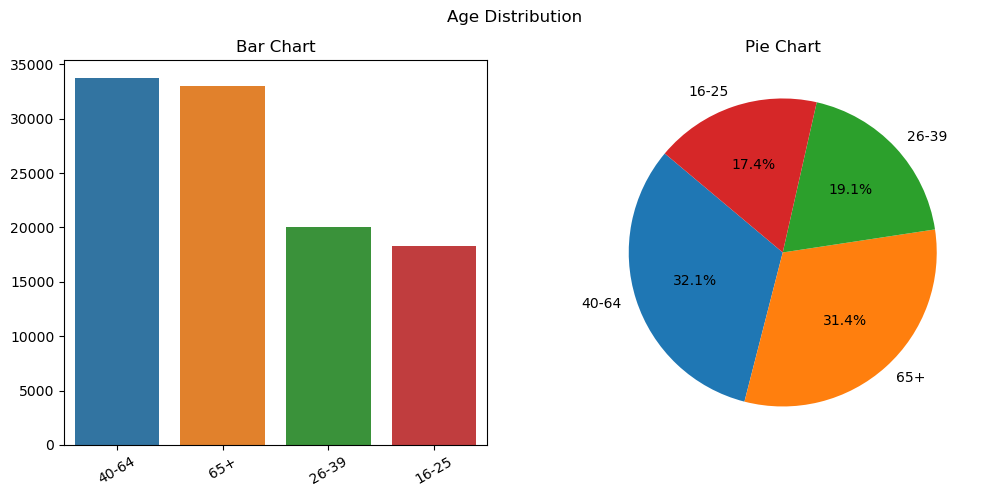

In [10]:
# Display the column distribution
plot_count('age', 'Age')

### Gender Distribution

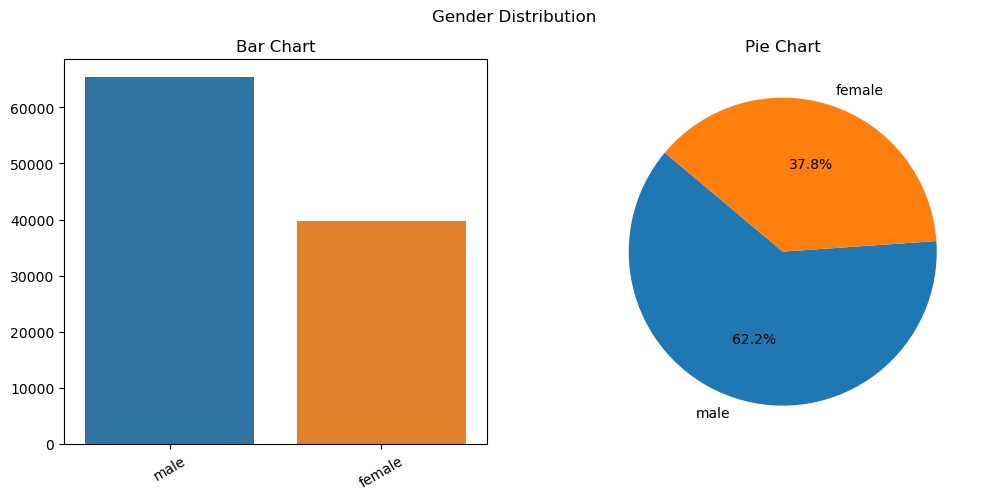

In [11]:
# Display the column distribution
plot_count('gender', 'Gender')

### Driving Experience Distribution

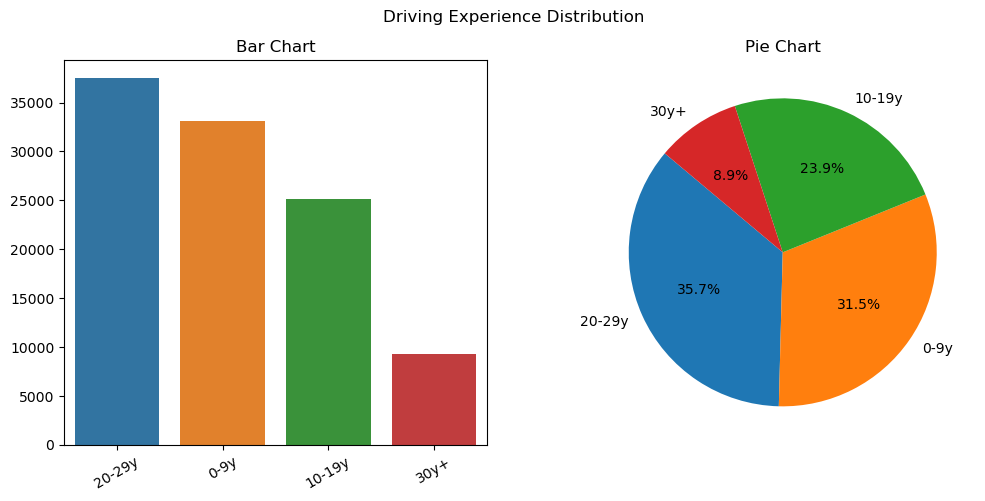

In [12]:
# Display the column distribution
plot_count('driving_experience', 'Driving Experience')

### Education Distribution

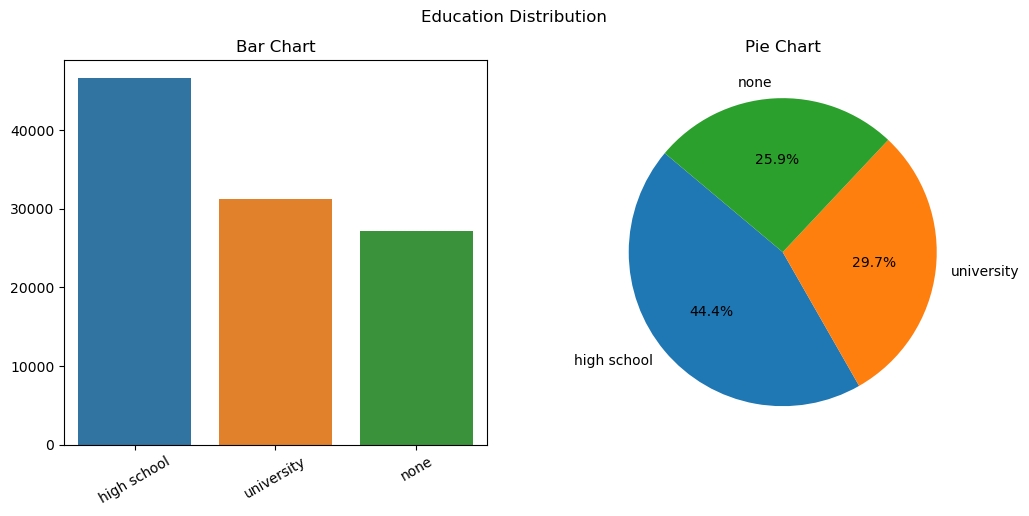

In [13]:
# Display the column distribution
plot_count('education', 'Education')

### Income Distribution

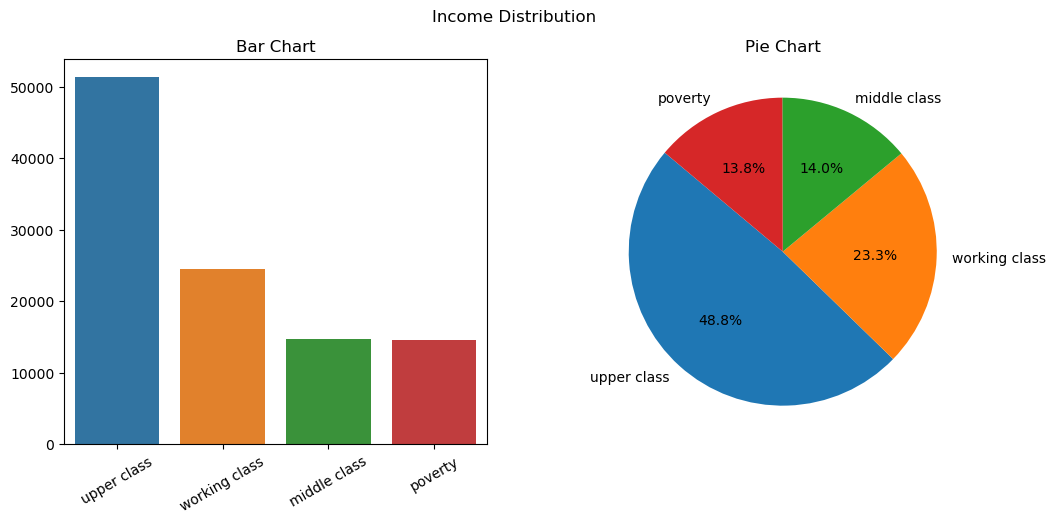

In [14]:
# Display the column distribution
plot_count('income', 'Income')

### Credit Score Distribution

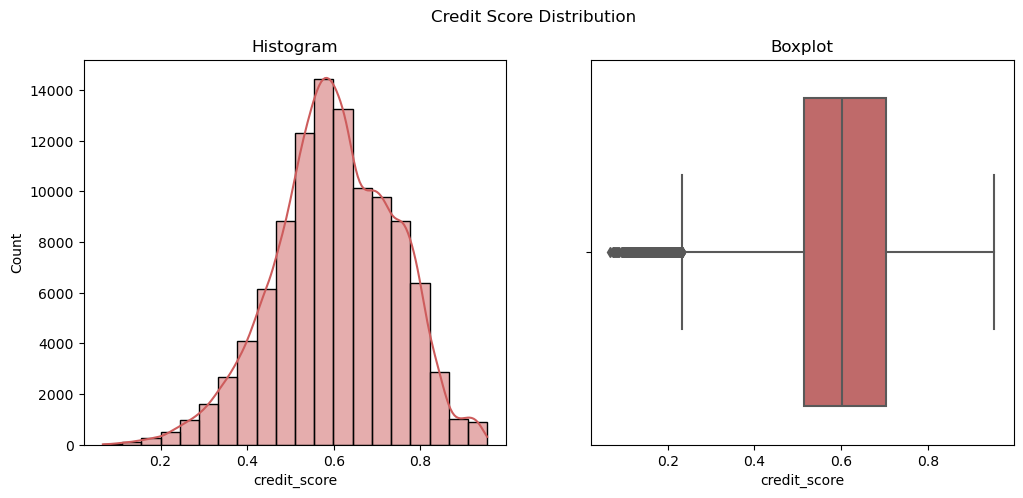

In [15]:
# Display the column distribution
plot_distribution('credit_score', 'Credit Score', 'indianred')

### Vehicle Ownership Distribution

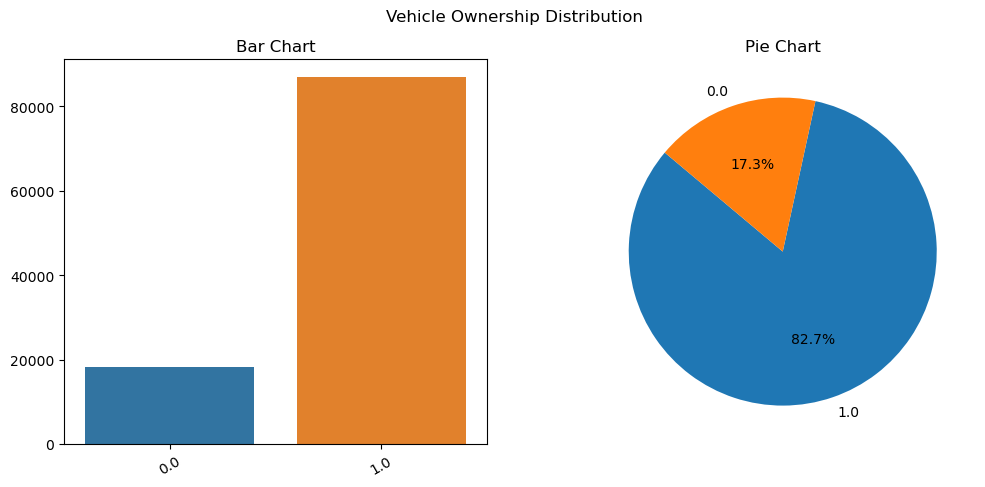

In [16]:
# Display the column distribution
plot_count('vehicle_ownership', 'Vehicle Ownership')

### Vehicle Year Distribution

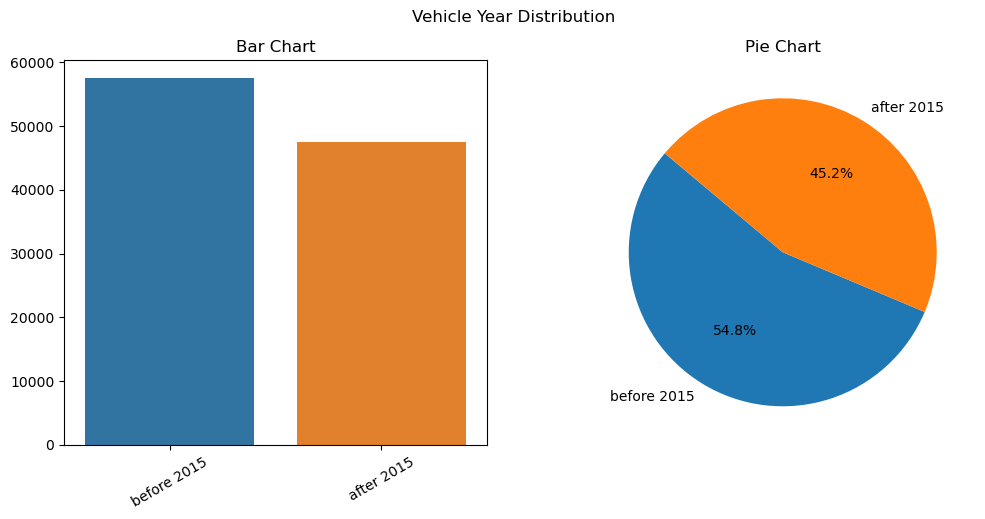

In [17]:
# Display the column distribution
plot_count('vehicle_year', 'Vehicle Year')

### Type of Vehicle Distribution

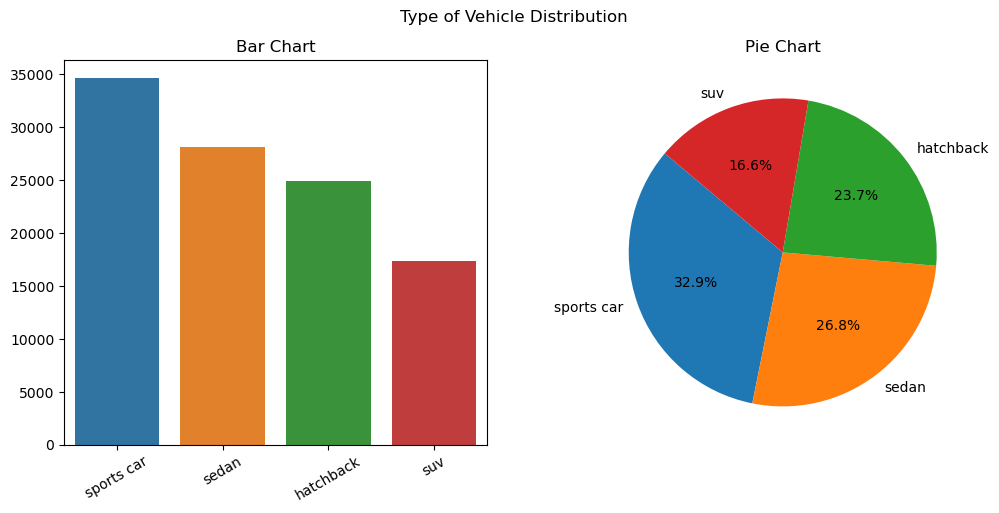

In [18]:
# Display the column distribution
plot_count('type_of_vehicle', 'Type of Vehicle')

### Married Distribution

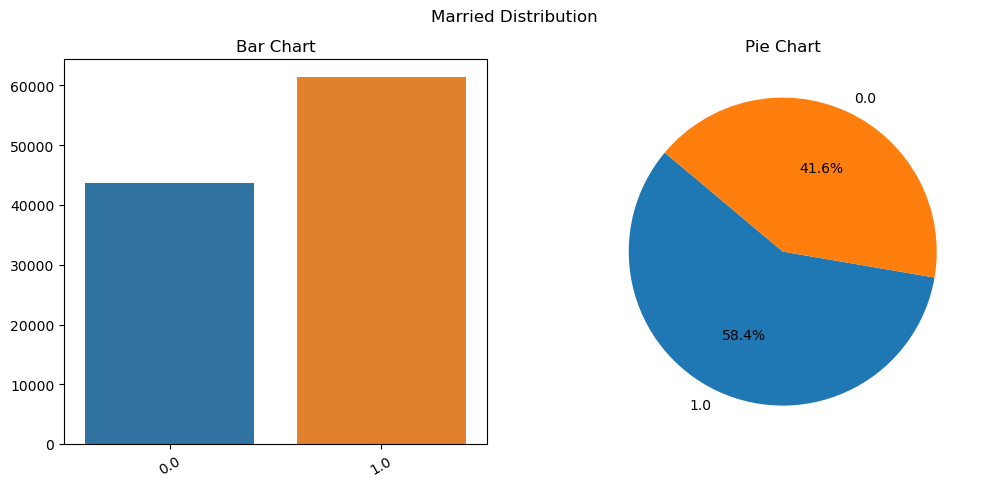

In [19]:
# Display the column distribution
plot_count('married', 'Married')

### Children Distribution

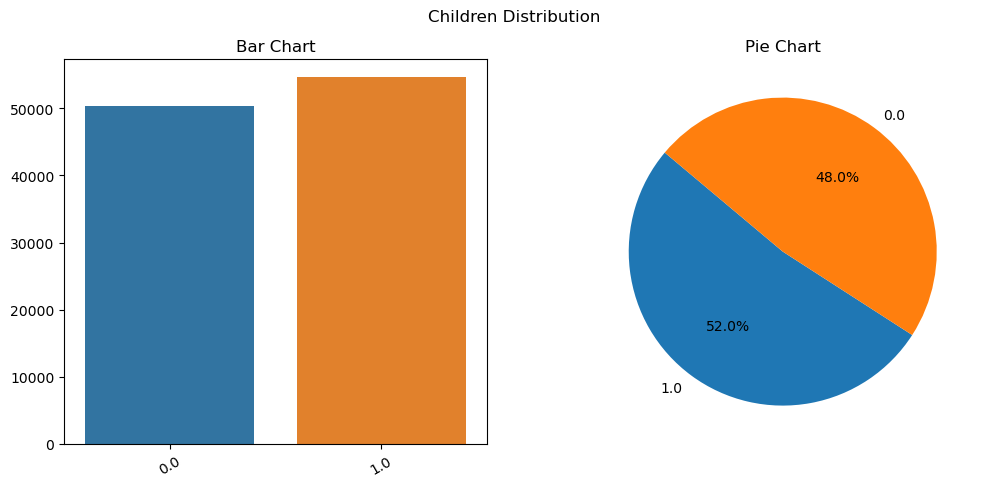

In [20]:
# Display the column distribution
plot_count('children', 'Children')

### Annual Mileage Distribution

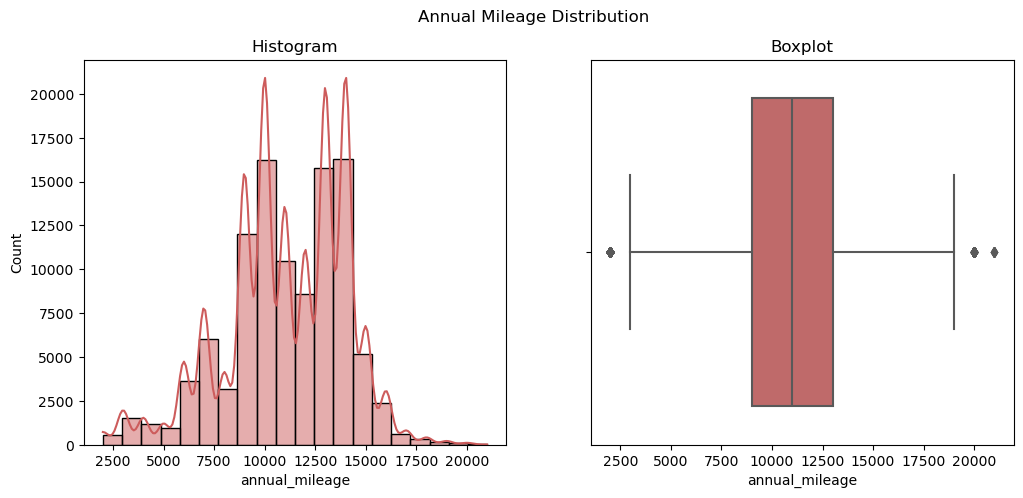

In [21]:
# Display the column distribution
plot_distribution('annual_mileage', 'Annual Mileage')

### Speeding Violations Distribution

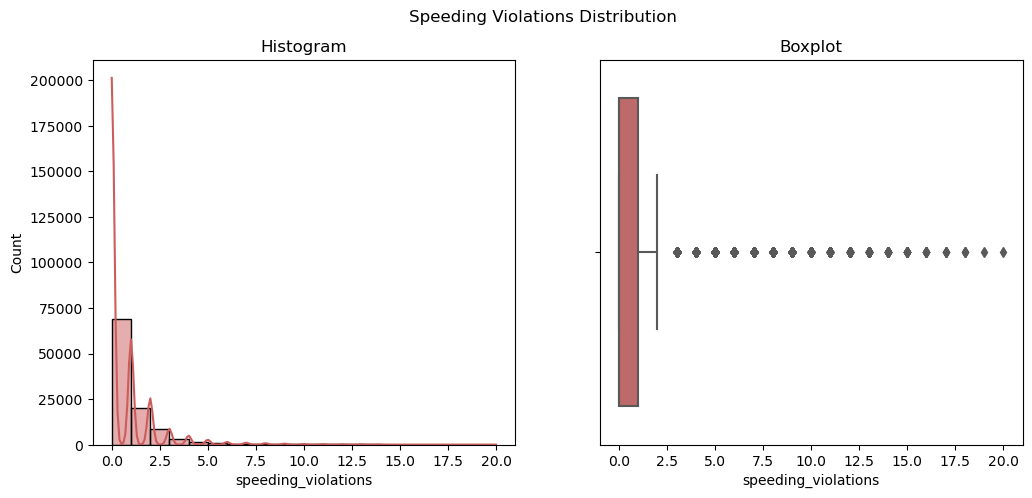

In [22]:
# Display the column distribution
plot_distribution('speeding_violations', 'Speeding Violations')

### DUIs Distribution

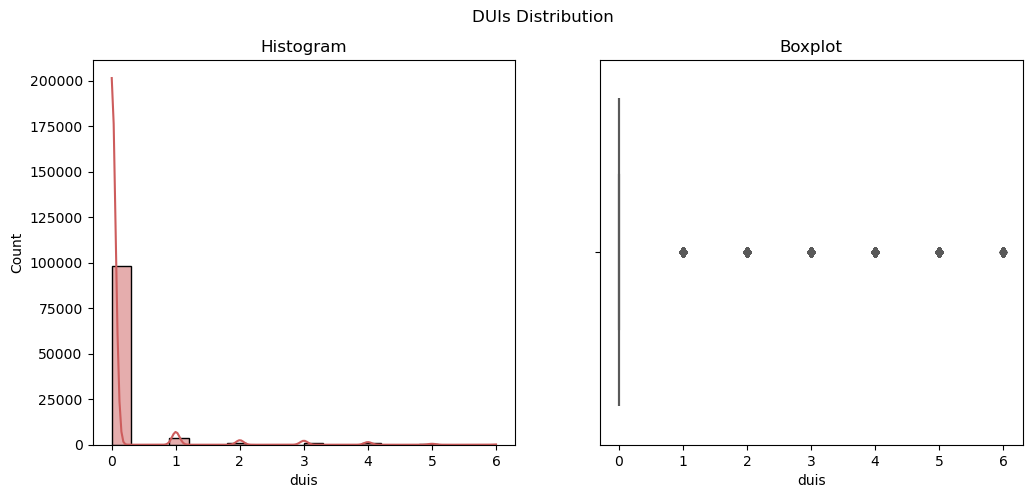

In [23]:
# Display the column distribution
plot_distribution('duis', 'DUIs')

### Past Accidents Distribution

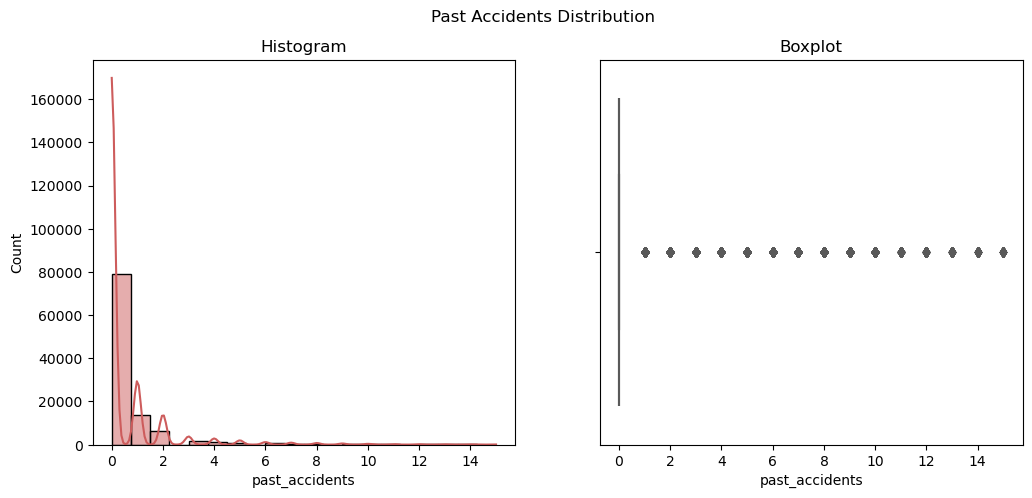

In [24]:
# Display the column distribution
plot_distribution('past_accidents', 'Past Accidents')

### Issue Distribution

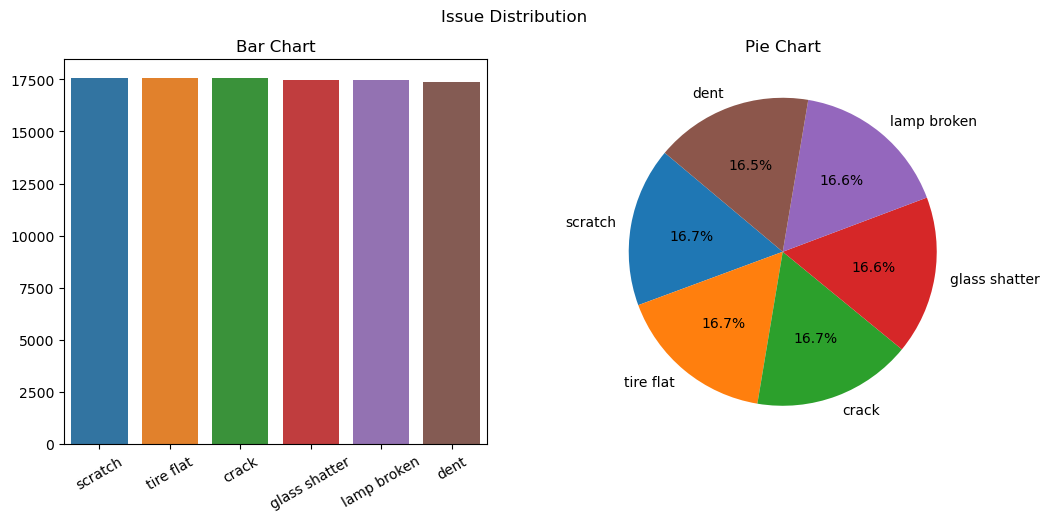

In [25]:
# Display the column distribution
plot_count('issue', 'Issue')

## Outcome Distribution

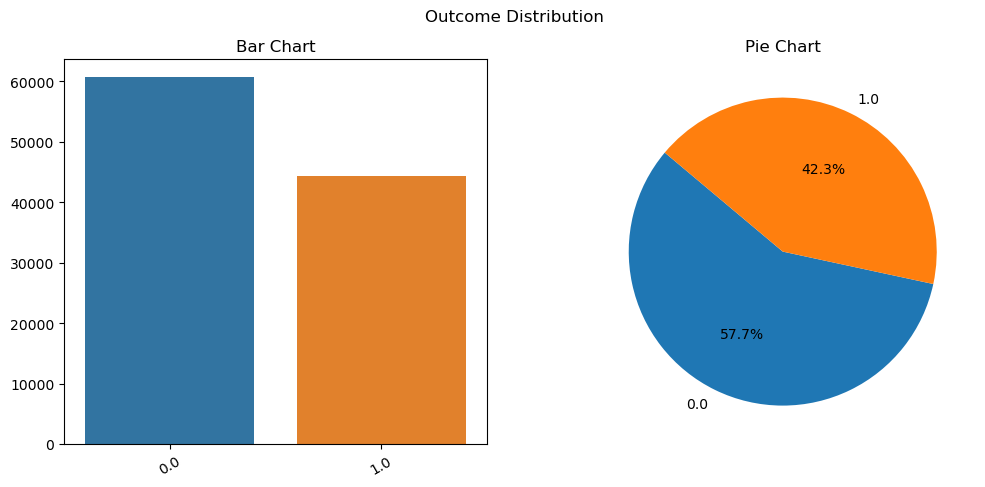

In [26]:
# Display the column distribution
plot_count('outcome', 'Outcome')

The target proportions in the data are quite balance, although there are more instances of 0 (Deny) than 1 (Accept). The difference is not that significant therefore the proportion is considered balance.

# **Feature Engineering** **!!!**

## Copy the Data

In [27]:
# Copying the Data
df = df_raw.copy()

df

,id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,type_of_vehicle,married,children,postal_code,annual_mileage,speeding_violations,duis,past_accidents,issue,outcome
0,816393,40-64,female,20-29y,university,middle class,0.638050,0.0,after 2015,sports car,0.0,0.0,37379,11000.0,0,0,0,glass shatter,0.0
1,251762,26-39,male,20-29y,high school,middle class,0.475741,1.0,before 2015,hatchback,1.0,0.0,10238,9000.0,0,0,0,dent,1.0
2,481952,40-64,male,20-29y,none,middle class,0.839817,1.0,before 2015,sedan,1.0,1.0,10238,12000.0,0,0,0,glass shatter,1.0
3,3506,40-64,male,20-29y,high school,upper class,0.682527,1.0,before 2015,sedan,0.0,1.0,92099,6000.0,1,0,0,dent,1.0
4,498013,40-64,female,20-29y,none,working class,0.572184,1.0,after 2015,sedan,1.0,1.0,32122,15000.0,0,0,1,glass shatter,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104995,19557,65+,female,0-9y,high school,upper class,0.672255,1.0,before 2015,suv,0.0,0.0,31885,9000.0,2,0,0,dent,0.0
104996,222459,40-64,female,0-9y,none,working class,0.514193,1.0,after 2015,sedan,1.0,0.0,32277,10000.0,0,0,0,scratch,1.0
104997,83089,16-25,male,10-19y,none,upper class,0.461942,1.0,after 2015,sedan,1.0,0.0,34800,11000.0,0,0,0,scratch,1.0
104998,984879,40-64,female,20-29y,high school,working class,0.483571,1.0,before 2015,hatchback,0.0,0.0,10238,10000.0,0,0,0,tire flat,0.0


We've successfully copied the data to the `df` variable.

## Handle Cardinality

In [28]:
# Defining all the categorical columns in data
cat_cols = list(df.select_dtypes(include='object').columns)

# For every categorical column
# check the number of unique values
cardinality_list = []
for col in cat_cols:
  cardinality_list.append([col, df[col].nunique()])

pd.DataFrame(columns=['Column Name', 'Num of Unique Values',], data=cardinality_list)

,Column Name,Num of Unique Values
0,age,4
1,gender,2
2,driving_experience,4
3,education,3
4,income,4
5,vehicle_year,2
6,type_of_vehicle,4
7,issue,6


As we can see from the table, the number of unique values in each column falls below 6, indicating low cardinality. Therefore, we don't need to handle the cardinality.

## Drop Duplicated ID

In [29]:
df = df.drop_duplicates(subset='id').reset_index(drop=True)

df

,id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,type_of_vehicle,married,children,postal_code,annual_mileage,speeding_violations,duis,past_accidents,issue,outcome
0,816393,40-64,female,20-29y,university,middle class,0.638050,0.0,after 2015,sports car,0.0,0.0,37379,11000.0,0,0,0,glass shatter,0.0
1,251762,26-39,male,20-29y,high school,middle class,0.475741,1.0,before 2015,hatchback,1.0,0.0,10238,9000.0,0,0,0,dent,1.0
2,481952,40-64,male,20-29y,none,middle class,0.839817,1.0,before 2015,sedan,1.0,1.0,10238,12000.0,0,0,0,glass shatter,1.0
3,3506,40-64,male,20-29y,high school,upper class,0.682527,1.0,before 2015,sedan,0.0,1.0,92099,6000.0,1,0,0,dent,1.0
4,498013,40-64,female,20-29y,none,working class,0.572184,1.0,after 2015,sedan,1.0,1.0,32122,15000.0,0,0,1,glass shatter,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98480,516906,40-64,male,20-29y,university,upper class,0.282996,1.0,before 2015,sedan,1.0,1.0,10238,12000.0,0,0,0,glass shatter,0.0
98481,19557,65+,female,0-9y,high school,upper class,0.672255,1.0,before 2015,suv,0.0,0.0,31885,9000.0,2,0,0,dent,0.0
98482,222459,40-64,female,0-9y,none,working class,0.514193,1.0,after 2015,sedan,1.0,0.0,32277,10000.0,0,0,0,scratch,1.0
98483,83089,16-25,male,10-19y,none,upper class,0.461942,1.0,after 2015,sedan,1.0,0.0,34800,11000.0,0,0,0,scratch,1.0


As we can see earlier, the dataset contains several duplicated id. Therefore, we dropped the rows with duplicated id. Now, the dataset is consists of 98485 rows and 19 columns.

## Split X (Features) and y (target)

In [30]:
# Splitting between X and y
X = df.drop(['outcome', 'id'], axis=1)
y = df['outcome']

print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')
X.head()

X shape: (98485, 17)
y shape: (98485,)


,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,type_of_vehicle,married,children,postal_code,annual_mileage,speeding_violations,duis,past_accidents,issue
0,40-64,female,20-29y,university,middle class,0.638050,0.0,after 2015,sports car,0.0,0.0,37379,11000.0,0,0,0,glass shatter
1,26-39,male,20-29y,high school,middle class,0.475741,1.0,before 2015,hatchback,1.0,0.0,10238,9000.0,0,0,0,dent
2,40-64,male,20-29y,none,middle class,0.839817,1.0,before 2015,sedan,1.0,1.0,10238,12000.0,0,0,0,glass shatter
3,40-64,male,20-29y,high school,upper class,0.682527,1.0,before 2015,sedan,0.0,1.0,92099,6000.0,1,0,0,dent
4,40-64,female,20-29y,none,working class,0.572184,1.0,after 2015,sedan,1.0,1.0,32122,15000.0,0,0,1,glass shatter


We've successfully split the data into X (Features) and y (target).

## Split Train and Test set

In [31]:
# Splitting between Train and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(f'X train shape: {X_train.shape}')
print(f'X test shape: {X_test.shape}')
print(f'y train shape: {y_train.shape}')
print(f'y test shape: {y_test.shape}')

X train shape: (78788, 17)
X test shape: (19697, 17)
y train shape: (78788,)
y test shape: (19697,)


We've successfully split the data into train and test set.

## Handling Outlier

In [32]:
# Define numeric columns
num_cols = X_train.select_dtypes(include=np.number).columns.to_list()

num_skewed_vals = []
skewed_cols = []

num_normal_vals = []
normal_cols = []

# For every numeric column
# Check the skewness value and determine whether
# the distribution skewed or normal
for col in num_cols:
    skew = X_train[col].skew()
    # Normal Distribution
    if skew <= 0.5 and skew >= -0.5:
        normal_cols.append(col)
        num_normal_vals.append([col, skew])
    # Skewed Distribution
    elif skew < -0.5 or skew > 0.5:
        skewed_cols.append(col)
        num_skewed_vals.append([col, skew])

# Display Columns with Skewed Distribution
print('Columns with Skewed Distribution')
pd.DataFrame(data=num_skewed_vals, columns=['Column Name', 'Skewness'])

Columns with Skewed Distribution


,Column Name,Skewness
0,vehicle_ownership,-1.734622
1,postal_code,2.991256
2,annual_mileage,-0.508013
3,speeding_violations,3.888105
4,duis,5.576762
5,past_accidents,4.340209


We observe that 6 columns exhibit a skewed distribution: `vehicle_ownership`, `postal_code`, `annual_mileage`, `speeding_violations`, `duis`, and `past_accidents`. Outliers in each of these columns with skewed distributions will be addressed using the Winsorizer module using the IQR method. However, based on our previous EDA, we have noted that the `vehicle_ownership`, `duis`, and `past_accidents` columns have low variation and may actually follow a normal distribution. Therefore, these two columns will be handled by the Winsorizer module using the Gaussian method.

In [33]:
# Display Columns with Normal Distribution
print('Columns with Normal Distribution')
pd.DataFrame(data=num_normal_vals, columns=['Column Name', 'Skewness'])

Columns with Normal Distribution


,Column Name,Skewness
0,credit_score,-0.228184
1,married,-0.340682
2,children,-0.076923


We observe that 3 columns exhibit a skewed distribution: `credit_score`, `married`, and `children`. Outliers in each of these columns with normal distributions will be addressed using the Winsorizer module using the Gaussian method.

In [34]:
# Define the skewed distribution but low variance columns
skew_low_vars = ['vehicle_ownership', 'duis', 'past_accidents']

# For every skewed distribution but low variance column
for skew_low in skew_low_vars:
    print(skew_low, end=' ')
    normal_cols.append(skew_low) # Adding to columns that will be handled using Gaussian Method
    skewed_cols.remove(skew_low) # Removing from columns that will be handled using IQR Method

vehicle_ownership duis past_accidents 

We've successfully move the `vehicle_ownership`, `duis`, and `past_accidents` columns into columns that will be handled using the Gaussian Method.

In [35]:
# Winsorizer declaration to handle the skewed data distribution
winsoriserIqr = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=1.5,
                            variables=skewed_cols,
                            missing_values='ignore')

# Fit & transform for the X_train and transform only for the X_test
X_train_capped = winsoriserIqr.fit_transform(X_train)
X_test_capped = winsoriserIqr.transform(X_test)

In [36]:
# Winsorizer declaration to handle the normal data distribution
winsoriserNormal = Winsorizer(capping_method='gaussian',
                            tail='both',
                            fold=3,
                            variables=normal_cols,
                            missing_values='ignore')

# Fit & transform for the X_train and transform only for the X_test
X_train_capped = winsoriserNormal.fit_transform(X_train_capped)
X_test_capped = winsoriserNormal.transform(X_test_capped)

We've successfully capped the data using the Winsorizer module, using respective method based on the distribution of the columns.

In [37]:
# Check the Skewness of the capped numeric columns in X_train
X_train_capped[num_cols].skew()

credit_score          -0.208877
vehicle_ownership     -1.734622
married               -0.340682
children              -0.076923
postal_code            1.224063
annual_mileage        -0.485408
speeding_violations    1.298169
duis                   4.087818
past_accidents         2.630306
dtype: float64

We observe that majority of the skewness value in each column still has a skewed distribution. 

## Handling Missing Value

In [38]:
# Checking num of missing values in every columns in X_train
X_train_capped.isna().sum().sort_values(ascending=False)

age                    0
married                0
past_accidents         0
duis                   0
speeding_violations    0
annual_mileage         0
postal_code            0
children               0
type_of_vehicle        0
gender                 0
vehicle_year           0
vehicle_ownership      0
credit_score           0
income                 0
education              0
driving_experience     0
issue                  0
dtype: int64

There are no missing values detected in any of the columns. So, we don't need to handle them.

## Feature Selection

### Splitting between Numeric and Categorical Columns

In [39]:
# Splitting between Numeric and Categorical Column Names
num_cols = X_train_capped.select_dtypes(include = np.number).columns.tolist()
cat_cols = X_train_capped.select_dtypes(include = ['object']).columns.tolist()

print(f'Numeric ({len(num_cols)}):\n{num_cols}')
print()
print(f'Categorical ({len(cat_cols)}):\n{cat_cols}')

Numeric (9):
['credit_score', 'vehicle_ownership', 'married', 'children', 'postal_code', 'annual_mileage', 'speeding_violations', 'duis', 'past_accidents']

Categorical (8):
['age', 'gender', 'driving_experience', 'education', 'income', 'vehicle_year', 'type_of_vehicle', 'issue']


We've successfully define the numeric and categorical columns. Now, we need to split the train and test set by numeric and categorical columns.

In [40]:
# Splitting between Numeric and Categorical Columns
X_train_num = X_train_capped[num_cols]
X_train_cat = X_train_capped[cat_cols]

X_test_num = X_test_capped[num_cols]
X_test_cat = X_test_capped[cat_cols]

X_train_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78788 entries, 37666 to 15725
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   credit_score         78788 non-null  float64
 1   vehicle_ownership    78788 non-null  float64
 2   married              78788 non-null  float64
 3   children             78788 non-null  float64
 4   postal_code          78788 non-null  float64
 5   annual_mileage       78788 non-null  float64
 6   speeding_violations  78788 non-null  float64
 7   duis                 78788 non-null  float64
 8   past_accidents       78788 non-null  float64
dtypes: float64(9)
memory usage: 6.0 MB


We've successfully split the train and test set by the types of the features (numeric and categorical).

### Correlation between Outcome and X_Train Numeric Columns

In [41]:
# Correlation between outcome and X_Train Numeric Columns
stats = []
p_values = []
interprets = []
selected_num = []
not_selected_num = []

# Loop every column in numerical continous columns
for col in num_cols:
    statistic, pvalue = f_oneway(X_train[col], y_train)

    if pvalue < 0.05:
        stats.append(statistic)
        p_values.append(pvalue)
        selected_num.append(col)
        interprets.append('Correlated')
    else:
        stats.append(statistic)
        p_values.append(pvalue)
        not_selected_num.append(col)
        interprets.append('Not Correlated')

pd.DataFrame({
    'Column Name': num_cols,
    'Statistic': stats,
    'P-value': p_values,
    'Interprets': interprets
})

,Column Name,Statistic,P-value,Interprets
0,credit_score,9.728953e+03,0.000000e+00,Correlated
1,vehicle_ownership,3.347848e+04,0.000000e+00,Correlated
2,married,4.230163e+03,0.000000e+00,Correlated
3,children,1.500127e+03,0.000000e+00,Correlated
4,postal_code,9.146071e+04,0.000000e+00,Correlated
5,annual_mileage,1.091656e+06,0.000000e+00,Correlated
6,speeding_violations,2.337705e+03,0.000000e+00,Correlated
7,duis,1.130455e+04,0.000000e+00,Correlated
8,past_accidents,5.557374e+02,1.161323e-122,Correlated


As we can see from the table, every numeric features are correlated with the target (outcome). Therefore, we will select all of the numeric columns. In this selection, we use ANOVA correlation because we want to see the relationship between the numeric features and the target. Several numeric columns has a categorical characteristics.

### Correlation between Outcome and X_Train Categorical Features

In [42]:
# Correlation between default payment next month and X_train categorical features
stats = []
p_values = []
interprets = []
selected_cat = []
not_selected_cat = []

# Loop every column in categorical columns
for col in cat_cols:
    # Create a contingency table between the categorical feature and the target variable
    contingency_table = pd.crosstab(X_train[col], y_train)
    
    # Perform the Chi-square test
    statistic, pvalue, _, _ = chi2_contingency(contingency_table)

    if pvalue < 0.05:
        stats.append(statistic)
        p_values.append(pvalue)
        selected_cat.append(col)
        interprets.append('Correlated')
    else:
        stats.append(statistic)
        p_values.append(pvalue)
        not_selected_cat.append(col)
        interprets.append('Not Correlated')

pd.DataFrame({
    'Column Name': cat_cols,
    'Statistic': stats,
    'P-value': p_values,
    'Interprets': interprets
})

,Column Name,Statistic,P-value,Interprets
0,age,2.725458,0.435918,Not Correlated
1,gender,9.550288,0.001999,Correlated
2,driving_experience,21.964631,0.000066,Correlated
3,education,1.094044,0.578670,Not Correlated
4,income,2.238966,0.524314,Not Correlated
5,vehicle_year,0.006070,0.937901,Not Correlated
6,type_of_vehicle,14.139058,0.002722,Correlated
7,issue,7.308602,0.198682,Not Correlated


As we can see, the `age`, `education`, `income`, `vehicle_year`, and `issue` columns are not correlated with the target (outcome). However, we want to retain the issue feature as issue is an important information to decide whether an insurance claim should be accepted or not. In this selection, we use chi2 correlation because we want to see the relationship between the categorical features and the target without relying on linearity as it makes more sense in a categorical characteristics.

In [43]:
# Define the feature to retain
features_to_retain = ['issue']

# For every feature needs to be retained
for feature in features_to_retain:
    print(feature)
    selected_cat.append('issue')
    not_selected_cat.remove('issue')

issue


We've successfully add the `issue` feature to the selected columns.

### Final Features

In [44]:
# Drop Columns that are not selected
selected_final =  selected_num + selected_cat

print(f'Drop columns: {not_selected_cat + not_selected_num}')
X_train_final = X_train[selected_final]
X_test_final = X_test[selected_final]

display(X_train_final.head())
X_test_final.head()

Drop columns: ['age', 'education', 'income', 'vehicle_year']


,credit_score,vehicle_ownership,married,children,postal_code,annual_mileage,speeding_violations,duis,past_accidents,gender,driving_experience,type_of_vehicle,issue
37666,0.598729,1.0,0.0,0.0,32244,7000.0,0,0,0,male,20-29y,sports car,tire flat
53142,0.685529,1.0,0.0,0.0,10238,13000.0,0,0,1,female,30y+,sports car,dent
74753,0.808157,1.0,0.0,1.0,10238,9000.0,2,0,0,male,20-29y,sedan,crack
28952,0.526635,0.0,0.0,0.0,29603,14000.0,0,0,0,male,20-29y,sedan,glass shatter
75063,0.497365,1.0,0.0,1.0,10238,7000.0,0,0,0,female,0-9y,sedan,tire flat


,credit_score,vehicle_ownership,married,children,postal_code,annual_mileage,speeding_violations,duis,past_accidents,gender,driving_experience,type_of_vehicle,issue
84136,0.609700,1.0,1.0,1.0,10238,13000.0,4,0,0,female,20-29y,sports car,crack
41681,0.526213,1.0,1.0,0.0,34380,7000.0,2,0,0,female,0-9y,hatchback,glass shatter
40908,0.524230,1.0,1.0,0.0,92101,10000.0,0,0,0,male,20-29y,suv,tire flat
50147,0.575277,1.0,0.0,1.0,10238,13000.0,1,1,0,male,20-29y,sedan,crack
70433,0.740362,1.0,0.0,1.0,10238,2000.0,0,0,2,male,30y+,hatchback,glass shatter


We've successfully defined the X train and X test final. Following this selection, they will undergo scaling and encoding processes.

## Scaling

In [45]:
# Checking the skew values in each column
X_train_num.skew()

credit_score          -0.208877
vehicle_ownership     -1.734622
married               -0.340682
children              -0.076923
postal_code            1.224063
annual_mileage        -0.485408
speeding_violations    1.298169
duis                   4.087818
past_accidents         2.630306
dtype: float64

As stated before, we can see that majority of the columns still follows a skewed distribution. Therefore, we can use MinMax Scaler as our scaler.

In [46]:
# Defining Scaler
scaler = MinMaxScaler()

scaler

MinMaxScaler()

We've successfully defined the scaler model using MinMax Scaler.

## Encoding

In [47]:
# Get num of unique values
X_train_cat.nunique()

age                   4
gender                2
driving_experience    4
education             3
income                4
vehicle_year          2
type_of_vehicle       4
issue                 6
dtype: int64

As stated earlier, we know that the data has a low cardinality. Therefore, we can encode the categorical columns using One-Hot Encoder.

In [48]:
# Encoding with One-Hot Encoder
encoder = OneHotEncoder()

encoder

OneHotEncoder()

We've successfully defined the endcoder model using One-Hot Encoder.

## Column Transformer

In [49]:
# Defining Column Transformer
transformer = ColumnTransformer([
    ('winsoriserIqr', winsoriserIqr, skewed_cols),
    ('winsoriserNormal', winsoriserNormal, normal_cols),
    ('scaler', scaler, selected_num),
    ('encoder', encoder, selected_cat),
], remainder='passthrough'
)

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('winsoriserIqr',
                                 Winsorizer(capping_method='iqr', fold=1.5,
                                            missing_values='ignore',
                                            tail='both',
                                            variables=['postal_code',
                                                       'annual_mileage',
                                                       'speeding_violations']),
                                 ['postal_code', 'annual_mileage',
                                  'speeding_violations']),
                                ('winsoriserNormal',
                                 Winsorizer(missing_values='ignore',
                                            tail='both',
                                            variables=[...
                                                       'past_accidents']),
                                 ['credit_score', 'married', 'children',
                                  'vehicle_ownership', 'duis',
                                  'past_accidents']),
                                ('scaler', MinMaxScaler(),
                                 ['credit_score', 'vehicle_ownership',
                                  'married', 'children', 'postal_code',
                                  'annual_mileage', 'speeding_violations',
                                  'duis', 'past_accidents']),
                                ('encoder', OneHotEncoder(),
                                 ['gender', 'driving_experience',
                                  'type_of_vehicle', 'issue'])])

We've successfully defined the preprocessing pipeline.

# **Model Definition** **!!!**

## Base Model Definition

### KNN Classifier

In [50]:
# Defining the model
knn_class = KNeighborsClassifier()

# Defining the pipeline model
knn_class_pipe = Pipeline([
    ('transformer', transformer),
    ('knn_class', knn_class)
])

knn_class_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('winsoriserIqr',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             missing_values='ignore',
                                                             tail='both',
                                                             variables=['postal_code',
                                                                        'annual_mileage',
                                                                        'speeding_violations']),
                                                  ['postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations']),
                                                 ('winsoriserNormal',
                                                  Winsorizer(missing_values='...
                                                  ['credit_score', 'married',
                                                   'children',
                                                   'vehicle_ownership', 'duis',
                                                   'past_accidents']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['credit_score',
                                                   'vehicle_ownership',
                                                   'married', 'children',
                                                   'postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations',
                                                   'duis', 'past_accidents']),
                                                 ('encoder', OneHotEncoder(),
                                                  ['gender',
                                                   'driving_experience',
                                                   'type_of_vehicle',
                                                   'issue'])])),
                ('knn_class', KNeighborsClassifier())])

We've successfully defined the KNN Classifier pipeline which consists of the preprocessing column transformer and the respective model.

### Decision Tree Classifier

In [51]:
# Defining the model
dt_class = DecisionTreeClassifier()

# Defining the pipeline model
dt_class_pipe = Pipeline([
    ('transformer', transformer),
    ('dt_class', dt_class)
])

dt_class_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('winsoriserIqr',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             missing_values='ignore',
                                                             tail='both',
                                                             variables=['postal_code',
                                                                        'annual_mileage',
                                                                        'speeding_violations']),
                                                  ['postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations']),
                                                 ('winsoriserNormal',
                                                  Winsorizer(missing_values='...
                                                  ['credit_score', 'married',
                                                   'children',
                                                   'vehicle_ownership', 'duis',
                                                   'past_accidents']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['credit_score',
                                                   'vehicle_ownership',
                                                   'married', 'children',
                                                   'postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations',
                                                   'duis', 'past_accidents']),
                                                 ('encoder', OneHotEncoder(),
                                                  ['gender',
                                                   'driving_experience',
                                                   'type_of_vehicle',
                                                   'issue'])])),
                ('dt_class', DecisionTreeClassifier())])

We've successfully defined the Decision Tree Classifier pipeline which consists of the preprocessing column transformer and the respective model.

### Random Forest Classifier

In [52]:
# Defining the model
rf_class = RandomForestClassifier()

# Defining the pipeline model
rf_class_pipe = Pipeline([
    ('transformer', transformer),
    ('rf_class', rf_class)
])

rf_class_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('winsoriserIqr',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             missing_values='ignore',
                                                             tail='both',
                                                             variables=['postal_code',
                                                                        'annual_mileage',
                                                                        'speeding_violations']),
                                                  ['postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations']),
                                                 ('winsoriserNormal',
                                                  Winsorizer(missing_values='...
                                                  ['credit_score', 'married',
                                                   'children',
                                                   'vehicle_ownership', 'duis',
                                                   'past_accidents']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['credit_score',
                                                   'vehicle_ownership',
                                                   'married', 'children',
                                                   'postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations',
                                                   'duis', 'past_accidents']),
                                                 ('encoder', OneHotEncoder(),
                                                  ['gender',
                                                   'driving_experience',
                                                   'type_of_vehicle',
                                                   'issue'])])),
                ('rf_class', RandomForestClassifier())])

We've successfully defined the Random Forest Classifier pipeline which consists of the preprocessing column transformer and the respective model.

### Gradient Boosting Classifier

In [53]:
# Defining the model
gbm_class = GradientBoostingClassifier()

# Defining the pipeline model
gbm_class_pipe = Pipeline([
    ('transformer', transformer),
    ('gbm_class', gbm_class)
])

gbm_class_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('winsoriserIqr',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             missing_values='ignore',
                                                             tail='both',
                                                             variables=['postal_code',
                                                                        'annual_mileage',
                                                                        'speeding_violations']),
                                                  ['postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations']),
                                                 ('winsoriserNormal',
                                                  Winsorizer(missing_values='...
                                                   'children',
                                                   'vehicle_ownership', 'duis',
                                                   'past_accidents']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['credit_score',
                                                   'vehicle_ownership',
                                                   'married', 'children',
                                                   'postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations',
                                                   'duis', 'past_accidents']),
                                                 ('encoder', OneHotEncoder(),
                                                  ['gender',
                                                   'driving_experience',
                                                   'type_of_vehicle',
                                                   'issue'])])),
                ('gbm_class', GradientBoostingClassifier())])

### Cat Boosting Classifier

In [54]:
# Defining the model
cat_boost_class = CatBoostClassifier(logging_level='Silent')

# Defining the pipeline model
cat_boost_class_pipe = Pipeline([
    ('transformer', transformer),
    ('cat_boost_class', cat_boost_class)
])

cat_boost_class_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('winsoriserIqr',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             missing_values='ignore',
                                                             tail='both',
                                                             variables=['postal_code',
                                                                        'annual_mileage',
                                                                        'speeding_violations']),
                                                  ['postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations']),
                                                 ('winsoriserNormal',
                                                  Winsorizer(missing_values='...
                                                   'vehicle_ownership', 'duis',
                                                   'past_accidents']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['credit_score',
                                                   'vehicle_ownership',
                                                   'married', 'children',
                                                   'postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations',
                                                   'duis', 'past_accidents']),
                                                 ('encoder', OneHotEncoder(),
                                                  ['gender',
                                                   'driving_experience',
                                                   'type_of_vehicle',
                                                   'issue'])])),
                ('cat_boost_class',
                 <catboost.core.CatBoostClassifier object at 0x283356c50>)])

We've successfully defined the CatBoost Classifier pipeline which consists of the preprocessing column transformer and the respective model.

### XGBoost Classifier

In [55]:
# Defining the model
xg_boost_class = XGBClassifier()

# Defining the pipeline model
xg_boost_class_pipe = Pipeline([
    ('transformer', transformer),
    ('xg_boost_class', xg_boost_class)
])

xg_boost_class_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('winsoriserIqr',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             missing_values='ignore',
                                                             tail='both',
                                                             variables=['postal_code',
                                                                        'annual_mileage',
                                                                        'speeding_violations']),
                                                  ['postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations']),
                                                 ('winsoriserNormal',
                                                  Winsorizer(missing_values='...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

We've successfully defined the XGBoost Classifier pipeline which consists of the preprocessing column transformer and the respective model.

## Metrics **!!!**

- **Precision**  
Reduce the number of not accepted claims that's predicted as accepted.
- **Accuracy**

# **Model Training** 

## Base Model Fitting

### KNN Classifier

In [56]:
# Modelling with the base model
knn_class_pipe.fit(X_train_final, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('winsoriserIqr',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             missing_values='ignore',
                                                             tail='both',
                                                             variables=['postal_code',
                                                                        'annual_mileage',
                                                                        'speeding_violations']),
                                                  ['postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations']),
                                                 ('winsoriserNormal',
                                                  Winsorizer(missing_values='...
                                                  ['credit_score', 'married',
                                                   'children',
                                                   'vehicle_ownership', 'duis',
                                                   'past_accidents']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['credit_score',
                                                   'vehicle_ownership',
                                                   'married', 'children',
                                                   'postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations',
                                                   'duis', 'past_accidents']),
                                                 ('encoder', OneHotEncoder(),
                                                  ['gender',
                                                   'driving_experience',
                                                   'type_of_vehicle',
                                                   'issue'])])),
                ('knn_class', KNeighborsClassifier())])

We've successfully fitted the KNN Classifier model.

### Decision Tree Classifier

In [57]:
# Modelling with the base model
dt_class_pipe.fit(X_train_final, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('winsoriserIqr',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             missing_values='ignore',
                                                             tail='both',
                                                             variables=['postal_code',
                                                                        'annual_mileage',
                                                                        'speeding_violations']),
                                                  ['postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations']),
                                                 ('winsoriserNormal',
                                                  Winsorizer(missing_values='...
                                                  ['credit_score', 'married',
                                                   'children',
                                                   'vehicle_ownership', 'duis',
                                                   'past_accidents']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['credit_score',
                                                   'vehicle_ownership',
                                                   'married', 'children',
                                                   'postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations',
                                                   'duis', 'past_accidents']),
                                                 ('encoder', OneHotEncoder(),
                                                  ['gender',
                                                   'driving_experience',
                                                   'type_of_vehicle',
                                                   'issue'])])),
                ('dt_class', DecisionTreeClassifier())])

We've successfully fitted the Decision Tree Classifier model.

### Random Forest Classifier

In [58]:
# Modelling with the base model
rf_class_pipe.fit(X_train_final, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('winsoriserIqr',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             missing_values='ignore',
                                                             tail='both',
                                                             variables=['postal_code',
                                                                        'annual_mileage',
                                                                        'speeding_violations']),
                                                  ['postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations']),
                                                 ('winsoriserNormal',
                                                  Winsorizer(missing_values='...
                                                  ['credit_score', 'married',
                                                   'children',
                                                   'vehicle_ownership', 'duis',
                                                   'past_accidents']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['credit_score',
                                                   'vehicle_ownership',
                                                   'married', 'children',
                                                   'postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations',
                                                   'duis', 'past_accidents']),
                                                 ('encoder', OneHotEncoder(),
                                                  ['gender',
                                                   'driving_experience',
                                                   'type_of_vehicle',
                                                   'issue'])])),
                ('rf_class', RandomForestClassifier())])

We've successfully fitted the Random Forest Classifier model.

### Gradient Boosting Classifier

In [59]:
# Modelling with the base model
gbm_class_pipe.fit(X_train_final, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('winsoriserIqr',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             missing_values='ignore',
                                                             tail='both',
                                                             variables=['postal_code',
                                                                        'annual_mileage',
                                                                        'speeding_violations']),
                                                  ['postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations']),
                                                 ('winsoriserNormal',
                                                  Winsorizer(missing_values='...
                                                   'children',
                                                   'vehicle_ownership', 'duis',
                                                   'past_accidents']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['credit_score',
                                                   'vehicle_ownership',
                                                   'married', 'children',
                                                   'postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations',
                                                   'duis', 'past_accidents']),
                                                 ('encoder', OneHotEncoder(),
                                                  ['gender',
                                                   'driving_experience',
                                                   'type_of_vehicle',
                                                   'issue'])])),
                ('gbm_class', GradientBoostingClassifier())])

We've successfully fitted the GBM Classifier model.

### CatBoost Classifier

In [60]:
# Modelling with the base model
cat_boost_class_pipe.fit(X_train_final, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('winsoriserIqr',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             missing_values='ignore',
                                                             tail='both',
                                                             variables=['postal_code',
                                                                        'annual_mileage',
                                                                        'speeding_violations']),
                                                  ['postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations']),
                                                 ('winsoriserNormal',
                                                  Winsorizer(missing_values='...
                                                   'vehicle_ownership', 'duis',
                                                   'past_accidents']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['credit_score',
                                                   'vehicle_ownership',
                                                   'married', 'children',
                                                   'postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations',
                                                   'duis', 'past_accidents']),
                                                 ('encoder', OneHotEncoder(),
                                                  ['gender',
                                                   'driving_experience',
                                                   'type_of_vehicle',
                                                   'issue'])])),
                ('cat_boost_class',
                 <catboost.core.CatBoostClassifier object at 0x283356c50>)])

We've successfully fitted the CatBoost Classifier model.

### XGBoost Classifier

In [61]:
# Modelling with the base model
xg_boost_class_pipe.fit(X_train_final, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('winsoriserIqr',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             missing_values='ignore',
                                                             tail='both',
                                                             variables=['postal_code',
                                                                        'annual_mileage',
                                                                        'speeding_violations']),
                                                  ['postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations']),
                                                 ('winsoriserNormal',
                                                  Winsorizer(missing_values='...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

We've successfully fitted the XGBoost Classifier model.

# **Model Evaluation** **!!!**

## Evaluation Functions

In [211]:
# Function to display the train and test score from the corresponding model
def train_test_score(modelName, model, isTuned = False):
    if isTuned == False:
        print(f'{modelName} Base Model Score')
    else:
        # Displaying the train and test score for tuned model
        print('Tuned Model Score')
        # Best hyperparameters for svc
        best_params_knn = model.best_params_
        print(f'Best params for {modelName}: {best_params_knn}')
        
    train_score = round(model.score(X_train_final, y_train),4)
    test_score = round(model.score(X_test_final, y_test),4)
    print('Training Score: ', train_score)
    print('Testing Score: ', test_score)

In [212]:
# Function to display the metrics score from the corresponding model
def metrics_score(modelName, y_pred_train, y_pred_test, isTuned=False):
    if isTuned == False:
        print(f'{modelName} Base Model Score')
    else:
        print(f'{modelName} Tuned Model Score')
    print()
    
    # Model evaluation using different metrics
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    
    train_precision = precision_score(y_train, y_pred_train)
    test_precision = precision_score(y_test, y_pred_test)

    print('Accuracy Score')
    print('Train Set:', train_accuracy)
    print('Test Set:', test_accuracy, '\n')

    print('Precision Score')
    print('Train Set:', train_precision)
    print('Test Set:', test_precision)

    return train_accuracy, test_accuracy, train_precision, test_precision


In [213]:
# Function to display classification report and confusion matrix
def classification_report_confusion_matrix(modelPipe, modelTitle, y_test_pred, isTuned=False):
    target = ['Not Accepted', 'Accepted']
    
    # Classification report for base model
    print(classification_report(y_test, y_test_pred, target_names = target))
    
    # Declaring Figure
    plt.figure(figsize=(5,5))

    # Confusion matrix for base model
    ConfusionMatrixDisplay.from_estimator(modelPipe, X_test_final, y_test, display_labels=target, cmap='RdPu_r')
    if isTuned:
        plt.title(f'Confusion Matrix for {modelTitle} Tuned Model')
    else:
        plt.title(f'Confusion Matrix for {modelTitle} Base Model')
    plt.show()

In [214]:
def cross_validation(modelPipe):
    # Cross Validation Train Base
    precision_train_cross_val_class = cross_val_score(modelPipe,
                                        X_train_final,
                                        y_train,
                                        cv=5,
                                        scoring='precision')

    print('Precision Score - All - Cross Validation  : ', precision_train_cross_val_class)
    print('Precision Score - Mean - Cross Validation : ', precision_train_cross_val_class.mean())
    print('Precision Score - Std - Cross Validation  : ', precision_train_cross_val_class.std())
    print('Precision Score - Range of Train-Set       : ', (precision_train_cross_val_class.mean()-precision_train_cross_val_class.std()) , '-', (precision_train_cross_val_class.mean()+precision_train_cross_val_class.std()))

## Base Model Evaluation

### KNN Classifier

In [215]:
# Displaying the train and test score for base model
train_test_score('KNN Classifier', knn_class_pipe)

KNN Classifier Base Model Score


Training Score:  0.6946
Testing Score:  0.5212


The train set accuracy score obtained from the KNN Classifier model is 69%. Meanwhile, the test set score obtained is 52%. Based on the scores of the train and test sets, it appears that the model is overfitting, as seen in the significant difference between the train and test set scores, approximately 13%. As seen in the score achieved, we can see that the model has a poor-moderate performance. Most likely, the model is still underfit.

In [216]:
# Predict using base model
y_knn_class_train_pred = knn_class_pipe.predict(X_train_final)
y_knn_class_test_pred = knn_class_pipe.predict(X_test_final)

# Displaying the metrics
knn_class_accuracy_train, knn_class_accuracy_test, knn_class_precision_train, knn_class_precision_test = metrics_score('KNN Classifier', y_knn_class_train_pred, y_knn_class_test_pred)

KNN Classifier Base Model Score

Accuracy Score
Train Set: 0.6945854698685079
Test Set: 0.5212468903893994 

Precision Score
Train Set: 0.6632157418897359
Test Set: 0.42387178405735976


The precision value obtained from the train set is approximately 66%. Meanwhile, for the test set it is approximately 42%. It is evident that the precision value for the test set is lower than that of the train set, indicating the model is not that stable. We can also see that the precision score is still quite low, implying the model still struggles to identify the pattern of the data.

              precision    recall  f1-score   support

Not Accepted       0.58      0.64      0.61     11350
    Accepted       0.42      0.36      0.39      8347

    accuracy                           0.52     19697
   macro avg       0.50      0.50      0.50     19697
weighted avg       0.51      0.52      0.51     19697



<Figure size 500x500 with 0 Axes>

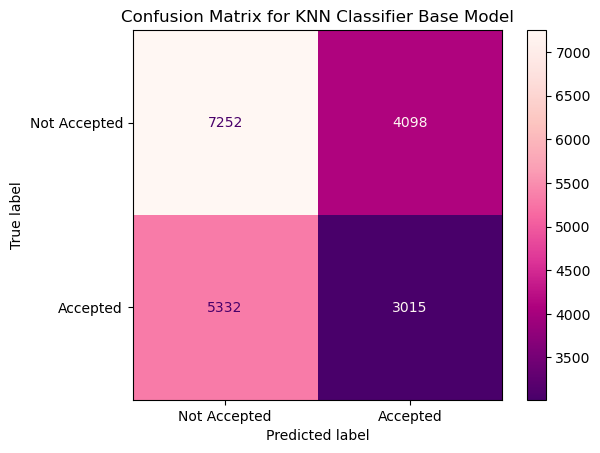

In [217]:
# Displaying classification report and confusion matrix
classification_report_confusion_matrix(knn_class_pipe, 'KNN Classifier', y_knn_class_test_pred)

From the confusion matrix, we can see that the models predicted as follows:

- **True Positive** (When claim is predicted as accepted and actually accepted): **3015 times** - Model correctly predict accepted as accepted.
- **False Positive** (When claim is predicted as accepted but actually not accepted): **4098 times** - Model incorrectly predict not accepted as accepted.
- **True Negative** (When claim is predicted as not accepted and actually not accepted): **7252 times** - Model correctly predict not accepted as not accepted.
- **False Negative** (When claim is predicted as not accepted but actually accepted): **5332 times** - Model incorrectly predict accepted as not accepted.

As we observe the precision score, the precision score to predict Accepted achieved at 42%. This score still considered quite low as the model still struggles to identify and predict the Accepted label. We can also see that the precision score to predict Not Accepted is a little bit higher but still considered quite low. This scores indicate that the model still performs poorly. 

In [218]:
# Displaying the cross validation score for train set
cross_validation(knn_class_pipe)

Precision Score - All - Cross Validation  :  [0.42319358 0.4270852  0.4173532  0.42504001 0.42643923]
Precision Score - Mean - Cross Validation :  0.4238222449083845
Precision Score - Std - Cross Validation  :  0.003499207112977736
Precision Score - Range of Train-Set       :  0.42032303779540675 - 0.42732145202136224


Deduced from the average precision score in Cross Validation, the model's prediction accuracy stands at 42%, indicating a relatively low performance. However, the precision score shows a standard deviation of around ~0.003, indicating stability in predictions throughout the 5 cross-validation folds. The observed range of precision scores is also not excessively large. Hence, it can be assumed that the model is reasonably consistent, even though its predictions exhibit a low accuracy.

### Decision Tree Classifier

In [219]:
# Displaying the train and test score for base model
train_test_score('Decision Tree Classifier', dt_class_pipe)

Decision Tree Classifier Base Model Score
Training Score:  1.0
Testing Score:  0.5121


The train set accuracy score obtained from the Decision Tree Classifier model is 100%. Meanwhile, the test set score obtained is 51%. Based on the scores of the train and test sets, it appears that the model is overfitting, as seen in the significant difference between the train and test set scores, approximately 49%. As seen in the score achieved, we can see that the model has a poor-moderate performance.

In [220]:
# Predict using base model
y_dt_class_train_pred = dt_class_pipe.predict(X_train_final)
y_dt_class_test_pred = dt_class_pipe.predict(X_test_final)

# Displaying the metrics
dt_class_accuracy_train, dt_class_accuracy_test, dt_class_precision_train, dt_class_precision_test = metrics_score('Decision Tree Classifier', y_dt_class_train_pred, y_dt_class_test_pred)

Decision Tree Classifier Base Model Score

Accuracy Score
Train Set: 1.0
Test Set: 0.512057673757425 

Precision Score
Train Set: 1.0
Test Set: 0.42520710059171596


              precision    recall  f1-score   support

Not Accepted       0.58      0.57      0.57     11350
    Accepted       0.43      0.43      0.43      8347

    accuracy                           0.51     19697
   macro avg       0.50      0.50      0.50     19697
weighted avg       0.51      0.51      0.51     19697



<Figure size 500x500 with 0 Axes>

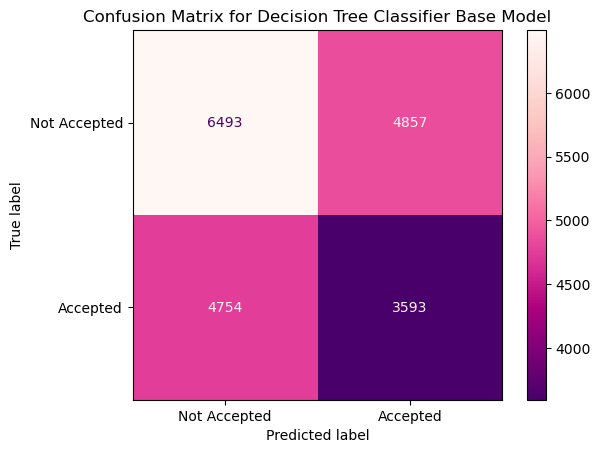

In [221]:
# Displaying classification report and confusion matrix
classification_report_confusion_matrix(dt_class_pipe, 'Decision Tree Classifier', y_dt_class_test_pred)

In [222]:
# Displaying the cross validation score for train set
cross_validation(dt_class_pipe)

Precision Score - All - Cross Validation  :  [0.43043088 0.42205774 0.42500369 0.42364895 0.41258741]
Precision Score - Mean - Cross Validation :  0.4227457337692936
Precision Score - Std - Cross Validation  :  0.0058075895221677085
Precision Score - Range of Train-Set       :  0.4169381442471259 - 0.4285533232914613


Deduced from the average precision score in Cross Validation, the model's prediction accuracy stands at 42%, indicating a relatively low performance. However, the precision score shows a standard deviation of around ~0.005, indicating stability in predictions throughout the 5 cross-validation folds. The observed range of precision scores is also not excessively large. Hence, it can be assumed that the model is reasonably consistent, even though its predictions exhibit a low accuracy.

### Random Forest Classifier

In [223]:
# Displaying the train and test score for base model
train_test_score('Random Forest Classifier', rf_class_pipe)

Random Forest Classifier Base Model Score
Training Score:  1.0
Testing Score:  0.541


In [224]:
# Predict using base model
y_rf_class_train_pred = rf_class_pipe.predict(X_train_final)
y_rf_class_test_pred = rf_class_pipe.predict(X_test_final)

# Displaying the metrics
rf_class_accuracy_train, rf_class_accuracy_test, rf_class_precision_train, rf_class_precision_test = metrics_score('Random Forest Classifier', y_rf_class_train_pred, y_rf_class_test_pred)

Random Forest Classifier Base Model Score

Accuracy Score
Train Set: 1.0
Test Set: 0.5410468599279078 

Precision Score
Train Set: 1.0
Test Set: 0.4269449715370019


              precision    recall  f1-score   support

Not Accepted       0.58      0.76      0.66     11350
    Accepted       0.43      0.24      0.31      8347

    accuracy                           0.54     19697
   macro avg       0.50      0.50      0.48     19697
weighted avg       0.51      0.54      0.51     19697



<Figure size 500x500 with 0 Axes>

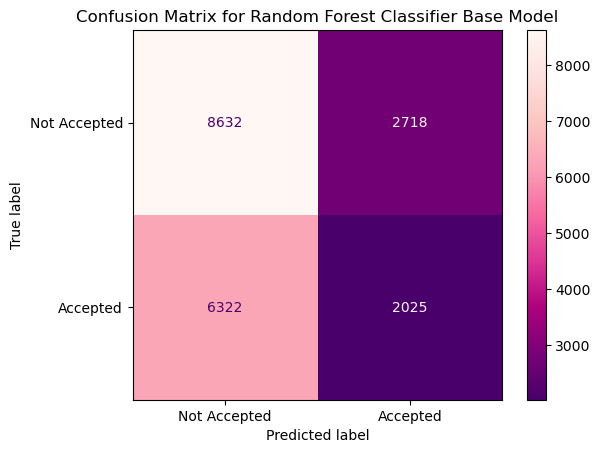

In [225]:
# Displaying classification report and confusion matrix
classification_report_confusion_matrix(rf_class_pipe, 'Random Forest Classifier', y_rf_class_test_pred)

In [226]:
# Displaying the cross validation score for train set
cross_validation(rf_class_pipe)

Precision Score - All - Cross Validation  :  [0.4278406  0.43220568 0.41958599 0.42811671 0.41840783]
Precision Score - Mean - Cross Validation :  0.42523136264648986
Precision Score - Std - Cross Validation  :  0.005333017898363412
Precision Score - Range of Train-Set       :  0.41989834474812643 - 0.4305643805448533


Deduced from the average precision score in Cross Validation, the model's prediction accuracy stands at 42-43%, indicating a relatively low performance. However, the precision score shows a standard deviation of around ~0.005, indicating stability in predictions throughout the 5 cross-validation folds. The observed range of precision scores is also not excessively large. Hence, it can be assumed that the model is reasonably consistent, even though its predictions exhibit a low accuracy.

### Gradient Boosting Classifier

In [227]:
# Displaying the train and test score for base model
train_test_score('GBM Classifier', gbm_class_pipe)

GBM Classifier Base Model Score
Training Score:  0.5795
Testing Score:  0.5756


In [228]:
# Predict using base model
y_gbm_class_train_pred = gbm_class_pipe.predict(X_train_final)
y_gbm_class_test_pred = gbm_class_pipe.predict(X_test_final)

# Displaying the metrics
gbm_class_accuracy_train, gbm_class_accuracy_test, gbm_class_precision_train, gbm_class_precision_test = metrics_score('GBM Classifier', y_gbm_class_train_pred, y_gbm_class_test_pred)

GBM Classifier Base Model Score

Accuracy Score
Train Set: 0.5794664162055135
Test Set: 0.5756206528913033 

Precision Score
Train Set: 0.8914285714285715
Test Set: 0.38


              precision    recall  f1-score   support

Not Accepted       0.58      1.00      0.73     11350
    Accepted       0.38      0.00      0.00      8347

    accuracy                           0.58     19697
   macro avg       0.48      0.50      0.37     19697
weighted avg       0.49      0.58      0.42     19697



<Figure size 500x500 with 0 Axes>

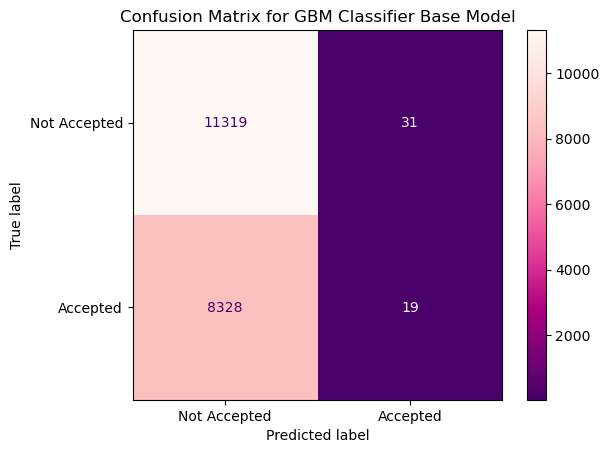

In [229]:
# Displaying classification report and confusion matrix
classification_report_confusion_matrix(gbm_class_pipe, 'GBM Classifier', y_gbm_class_test_pred)

In [230]:
# Displaying the cross validation score for train set
cross_validation(gbm_class_pipe)

Precision Score - All - Cross Validation  :  [0.46428571 0.31372549 0.36170213 0.41463415 0.34090909]
Precision Score - Mean - Cross Validation :  0.3790513138783843
Precision Score - Std - Cross Validation  :  0.05395243767274758
Precision Score - Range of Train-Set       :  0.3250988762056367 - 0.4330037515511319


Deduced from the average precision score in Cross Validation, the model's prediction accuracy stands at 38%, indicating a relatively low performance. The score obtained by this model is relatively lower than the earlier models. However, the precision score shows a standard deviation of around ~0.054, indicating stability in predictions throughout the 5 cross-validation folds. Although, it's not as stable as the other model. The observed range of precision scores is also not excessively large. Hence, it can be assumed that the model is reasonably consistent, even though its predictions exhibit a low accuracy.

### CatBoost Classifier

In [231]:
# Displaying the train and test score for base model
train_test_score('CatBoost Classifier', cat_boost_class_pipe)

CatBoost Classifier Base Model Score
Training Score:  0.6183
Testing Score:  0.5705


In [232]:
# Predict using base model
y_cat_boost_class_train_pred = cat_boost_class_pipe.predict(X_train_final)
y_cat_boost_class_test_pred = cat_boost_class_pipe.predict(X_test_final)

# Displaying the metrics
cat_boost_class_accuracy_train, cat_boost_class_accuracy_test, cat_boost_class_precision_train, cat_boost_class_precision_test = metrics_score('CatBoost Classifier', y_cat_boost_class_train_pred, y_cat_boost_class_test_pred)

CatBoost Classifier Base Model Score

Accuracy Score
Train Set: 0.6182540488399249
Test Set: 0.5704929684723562 

Precision Score
Train Set: 0.8630884694109621
Test Set: 0.43811610076670315


              precision    recall  f1-score   support

Not Accepted       0.58      0.95      0.72     11350
    Accepted       0.44      0.05      0.09      8347

    accuracy                           0.57     19697
   macro avg       0.51      0.50      0.40     19697
weighted avg       0.52      0.57      0.45     19697



<Figure size 500x500 with 0 Axes>

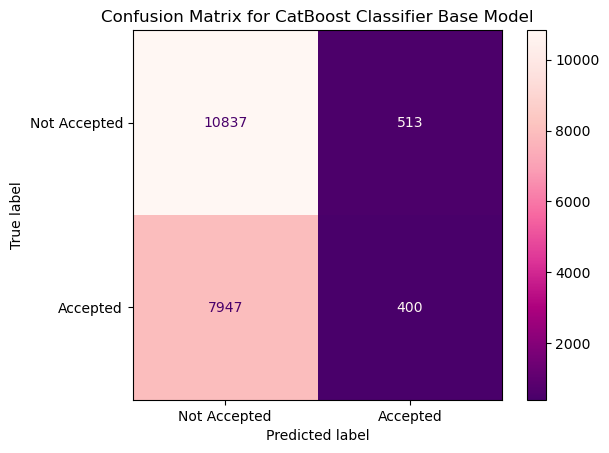

In [233]:
# Displaying classification report and confusion matrix
classification_report_confusion_matrix(cat_boost_class_pipe, 'CatBoost Classifier', y_cat_boost_class_test_pred)

In [234]:
# Displaying the cross validation score for train set
cross_validation(cat_boost_class_pipe)

Precision Score - All - Cross Validation  :  [0.44076433 0.40194884 0.4284141  0.41815857 0.40952381]
Precision Score - Mean - Cross Validation :  0.41976192965995585
Precision Score - Std - Cross Validation  :  0.013716098593916643
Precision Score - Range of Train-Set       :  0.4060458310660392 - 0.4334780282538725


Deduced from the average precision score in Cross Validation, the model's prediction accuracy stands at 42%, indicating a relatively low performance. However, the precision score shows a standard deviation of around ~0.014, indicating stability in predictions throughout the 5 cross-validation folds. The observed range of precision scores is also not excessively large. Hence, it can be assumed that the model is reasonably consistent, even though its predictions exhibit a low accuracy.

### XGBoost Classifier

In [235]:
# Displaying the train and test score for base model
train_test_score('XGBoost Classifier', xg_boost_class_pipe)

XGBoost Classifier Base Model Score
Training Score:  0.6397
Testing Score:  0.5605


In [236]:
# Predict using base model
y_xg_boost_class_train_pred = xg_boost_class_pipe.predict(X_train_final)
y_xg_boost_class_test_pred = xg_boost_class_pipe.predict(X_test_final)

# Displaying the metrics
xg_boost_class_accuracy_train, xg_boost_class_accuracy_test, xg_boost_class_precision_train, xg_boost_class_precision_test = metrics_score('XGBoost Classifier', y_xg_boost_class_train_pred, y_cat_boost_class_test_pred)

XGBoost Classifier Base Model Score

Accuracy Score
Train Set: 0.6397167081281413
Test Set: 0.5704929684723562 

Precision Score
Train Set: 0.7964311726147123
Test Set: 0.43811610076670315


              precision    recall  f1-score   support

Not Accepted       0.58      0.90      0.70     11350
    Accepted       0.42      0.10      0.16      8347

    accuracy                           0.56     19697
   macro avg       0.50      0.50      0.43     19697
weighted avg       0.51      0.56      0.47     19697



<Figure size 500x500 with 0 Axes>

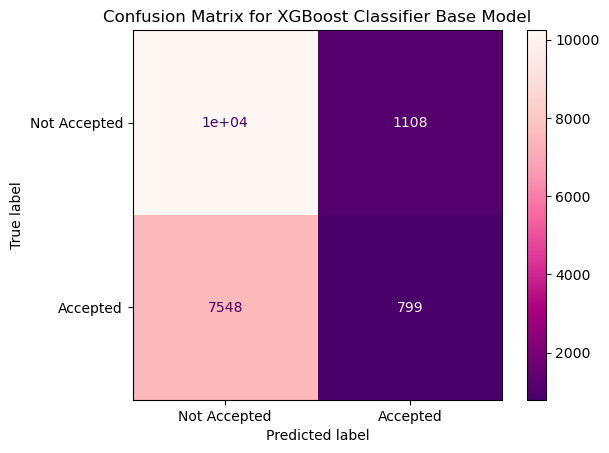

In [237]:
# Displaying classification report and confusion matrix
classification_report_confusion_matrix(xg_boost_class_pipe, 'XGBoost Classifier', y_xg_boost_class_test_pred)

In [238]:
# Displaying the cross validation score for train set
cross_validation(xg_boost_class_pipe)

Precision Score - All - Cross Validation  :  [0.4229765  0.41105263 0.42999502 0.4324474  0.41725888]
Precision Score - Mean - Cross Validation :  0.4227460862271604
Precision Score - Std - Cross Validation  :  0.007919113771200548
Precision Score - Range of Train-Set       :  0.4148269724559599 - 0.43066519999836095


Deduced from the average precision score in Cross Validation, the model's prediction accuracy stands at 42%, indicating a relatively low performance. However, the precision score shows a standard deviation of around ~0.008, indicating stability in predictions throughout the 5 cross-validation folds. The observed range of precision scores is also not excessively large. Hence, it can be assumed that the model is reasonably consistent, even though its predictions exhibit a low accuracy.

### All Base Model Comparisons

In [239]:
# Creating dictionary of all the models
model_comparison_dict = {
    'KNN Classifier': [
        knn_class_accuracy_train, knn_class_accuracy_test, '---',
        knn_class_precision_train, knn_class_precision_test
    ], 'Decision Tree Classifier': [
        dt_class_accuracy_train, dt_class_accuracy_test, '---',
        dt_class_precision_train, dt_class_precision_test
    ], 'Random Forest Classifier': [
        rf_class_accuracy_train, rf_class_accuracy_test, '---',
        rf_class_precision_train, rf_class_precision_test
    ], 'Gradient Boosting Classifier': [
        gbm_class_accuracy_train, gbm_class_accuracy_test, '---',
        gbm_class_precision_train, gbm_class_precision_test
    ], 'CatBoost Classifier': [
        cat_boost_class_accuracy_train, cat_boost_class_accuracy_test, '---',
        cat_boost_class_precision_train, cat_boost_class_precision_test
    ], 'XGBoost Classifier': [
        xg_boost_class_accuracy_train, xg_boost_class_accuracy_test, '---',
        xg_boost_class_precision_train, xg_boost_class_precision_test
    ]
}

pd.DataFrame(model_comparison_dict, index=['Accuracy - Train', 'Accuracy - Test', '---', 'Precision Score - Train', 'Precision Score - Test'])

,KNN Classifier,Decision Tree Classifier,Random Forest Classifier,Gradient Boosting Classifier,CatBoost Classifier,XGBoost Classifier
Accuracy - Train,0.694585,1.0,1.0,0.579466,0.618254,0.639717
Accuracy - Test,0.521247,0.512058,0.541047,0.575621,0.570493,0.570493
---,---,---,---,---,---,---
Precision Score - Train,0.663216,1.0,1.0,0.891429,0.863088,0.796431
Precision Score - Test,0.423872,0.425207,0.426945,0.38,0.438116,0.438116


The table above indicates that all the model has a quite poor to moderate performance. Based on the precision and the accuracy, the CatBoost Classifier and XGBoost Classifier model are the most potential model to boost the performance using hyperparameter tuning. The difference between precision score obtained in train and test set for these two model is the lowest compared to other model, indicating more stability and reliability. However, both of them still has a quite poor performance. We can see potential for hyperparameter tuning through these two model as both of them is using tree-based algorithm as the base estimator. Tree-based algorithm is prone to overfit when not tuned. Therefore, we'll perform hyperparameter tuning for these two models.

## Hyperparameter Tuning & the Evaluation

### CatBoost Classifier

In [258]:
# Define the hyperparameter grid
cat_boost_class_param_grid = {
    'cat_boost_class__learning_rate': [0.01, 0.05, 0.1],
    'cat_boost_class__max_depth': [4, 6, 8]
}

# Defining the grid search for the model
cat_boost_class_random = RandomizedSearchCV(cat_boost_class_pipe, cat_boost_class_param_grid, cv=5, n_iter=10)

cat_boost_class_random

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('winsoriserIqr',
                                                                               Winsorizer(capping_method='iqr',
                                                                                          fold=1.5,
                                                                                          missing_values='ignore',
                                                                                          tail='both',
                                                                                          variables=['postal_code',
                                                                                                     'annual_mileage',
                                                                                                     'speeding_violations']),
                                                                               ['postal_code',
                                                                                'annual_mileage',
                                                                                'speeding_violations']),
                                                                              ('winsoriserN...
                                                                                'postal_code',
                                                                                'annual_mileage',
                                                                                'speeding_violations',
                                                                                'duis',
                                                                                'past_accidents']),
                                                                              ('encoder',
                                                                               OneHotEncoder(),
                                                                               ['gender',
                                                                                'driving_experience',
                                                                                'type_of_vehicle',
                                                                                'issue'])])),
                                             ('cat_boost_class',
                                              <catboost.core.CatBoostClassifier object at 0x283356c50>)]),
                   param_distributions={'cat_boost_class__learning_rate': [0.01,
                                                                           0.05,
                                                                           0.1],
                                        'cat_boost_class__max_depth': [4, 6,
                                                                       8]})

We've successfully set up the pipeline for Random Search CV on the CatBoost Classifier to identify the optimal parameters.

In [259]:
# Modelling with Hyperparameter Tuning using Randomized Search
cat_boost_class_random.fit(X_train_final, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('winsoriserIqr',
                                                                               Winsorizer(capping_method='iqr',
                                                                                          fold=1.5,
                                                                                          missing_values='ignore',
                                                                                          tail='both',
                                                                                          variables=['postal_code',
                                                                                                     'annual_mileage',
                                                                                                     'speeding_violations']),
                                                                               ['postal_code',
                                                                                'annual_mileage',
                                                                                'speeding_violations']),
                                                                              ('winsoriserN...
                                                                                'postal_code',
                                                                                'annual_mileage',
                                                                                'speeding_violations',
                                                                                'duis',
                                                                                'past_accidents']),
                                                                              ('encoder',
                                                                               OneHotEncoder(),
                                                                               ['gender',
                                                                                'driving_experience',
                                                                                'type_of_vehicle',
                                                                                'issue'])])),
                                             ('cat_boost_class',
                                              <catboost.core.CatBoostClassifier object at 0x283356c50>)]),
                   param_distributions={'cat_boost_class__learning_rate': [0.01,
                                                                           0.05,
                                                                           0.1],
                                        'cat_boost_class__max_depth': [4, 6,
                                                                       8]})

In [260]:
# Displaying the train and test score for tuned model
train_test_score('CatBoost Classifier', cat_boost_class_random, True)

Tuned Model Score
Best params for CatBoost Classifier: {'cat_boost_class__max_depth': 4, 'cat_boost_class__learning_rate': 0.01}
Training Score:  0.5778
Testing Score:  0.5763


In [263]:
# Predict using base model
y_cat_boost_tuned_train_pred = cat_boost_class_random.predict(X_train_final)
y_cat_boost_tuned_test_pred = cat_boost_class_random.predict(X_test_final)

# Displaying the metrics
cat_boost_tuned_accuracy_train, cat_boost_tuned_accuracy_test, cat_boost_tuned_precision_train, cat_boost_tuned_precision_test = metrics_score('XGBoost Classifier', y_cat_boost_tuned_train_pred, y_cat_boost_class_test_pred, True)

XGBoost Classifier Tuned Model Score

Accuracy Score
Train Set: 0.5778164187439712
Test Set: 0.5704929684723562 

Precision Score
Train Set: 1.0
Test Set: 0.43811610076670315


              precision    recall  f1-score   support

Not Accepted       0.58      1.00      0.73     11350
    Accepted       1.00      0.00      0.00      8347

    accuracy                           0.58     19697
   macro avg       0.79      0.50      0.37     19697
weighted avg       0.76      0.58      0.42     19697



<Figure size 500x500 with 0 Axes>

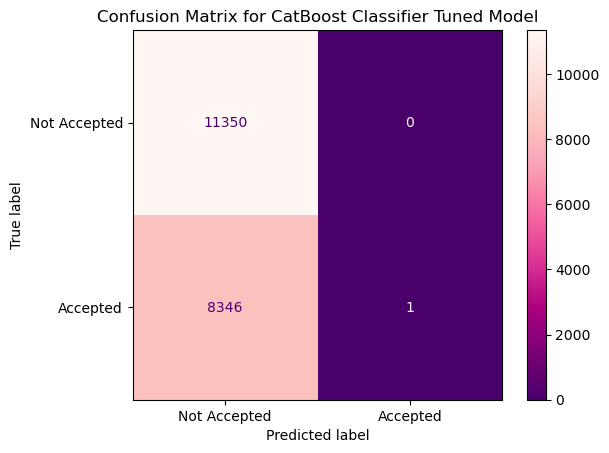

In [264]:
# Displaying classification report and confusion matrix
classification_report_confusion_matrix(cat_boost_class_random, 'CatBoost Classifier', y_cat_boost_tuned_test_pred, True)

In [265]:
# Displaying the cross validation score for train set
cross_validation(cat_boost_class_random)

Precision Score - All - Cross Validation  :  [0.5 1.  0.5 1.  0. ]
Precision Score - Mean - Cross Validation :  0.6
Precision Score - Std - Cross Validation  :  0.37416573867739417
Precision Score - Range of Train-Set       :  0.2258342613226058 - 0.9741657386773941


### XGBoost Classifier

In [266]:
# Define the hyperparameter grid
xg_boost_class_param_grid = {
    'xg_boost_class__learning_rate': [0.01, 0.05, 0.1],
    'xg_boost_class__max_depth': [4, 6, 8]
}

# Defining the grid search for the model
xg_boost_class_random = RandomizedSearchCV(xg_boost_class_pipe, xg_boost_class_param_grid, cv=5, n_iter=10)

xg_boost_class_random

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('winsoriserIqr',
                                                                               Winsorizer(capping_method='iqr',
                                                                                          fold=1.5,
                                                                                          missing_values='ignore',
                                                                                          tail='both',
                                                                                          variables=['postal_code',
                                                                                                     'annual_mileage',
                                                                                                     'speeding_violations']),
                                                                               ['postal_code',
                                                                                'annual_mileage',
                                                                                'speeding_violations']),
                                                                              ('winsoriserN...
                                                            max_cat_threshold=None,
                                                            max_cat_to_onehot=None,
                                                            max_delta_step=None,
                                                            max_depth=None,
                                                            max_leaves=None,
                                                            min_child_weight=None,
                                                            missing=nan,
                                                            monotone_constraints=None,
                                                            multi_strategy=None,
                                                            n_estimators=None,
                                                            n_jobs=None,
                                                            num_parallel_tree=None,
                                                            random_state=None, ...))]),
                   param_distributions={'xg_boost_class__learning_rate': [0.01,
                                                                          0.05,
                                                                          0.1],
                                        'xg_boost_class__max_depth': [4, 6, 8]})

We've successfully set up the pipeline for Random Search CV on the XGBoost Classifier to identify the optimal parameters.

In [267]:
# Modelling with Hyperparameter Tuning using Randomized Search
xg_boost_class_random.fit(X_train_final, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('winsoriserIqr',
                                                                               Winsorizer(capping_method='iqr',
                                                                                          fold=1.5,
                                                                                          missing_values='ignore',
                                                                                          tail='both',
                                                                                          variables=['postal_code',
                                                                                                     'annual_mileage',
                                                                                                     'speeding_violations']),
                                                                               ['postal_code',
                                                                                'annual_mileage',
                                                                                'speeding_violations']),
                                                                              ('winsoriserN...
                                                            max_cat_threshold=None,
                                                            max_cat_to_onehot=None,
                                                            max_delta_step=None,
                                                            max_depth=None,
                                                            max_leaves=None,
                                                            min_child_weight=None,
                                                            missing=nan,
                                                            monotone_constraints=None,
                                                            multi_strategy=None,
                                                            n_estimators=None,
                                                            n_jobs=None,
                                                            num_parallel_tree=None,
                                                            random_state=None, ...))]),
                   param_distributions={'xg_boost_class__learning_rate': [0.01,
                                                                          0.05,
                                                                          0.1],
                                        'xg_boost_class__max_depth': [4, 6, 8]})

In [268]:
# Displaying the train and test score for tuned model
train_test_score('XGBoost Classifier', xg_boost_class_random, True)

Tuned Model Score
Best params for XGBoost Classifier: {'xg_boost_class__max_depth': 4, 'xg_boost_class__learning_rate': 0.01}
Training Score:  0.5777
Testing Score:  0.5762


In [269]:
# Predict using base model
y_xg_boost_tuned_train_pred = xg_boost_class_random.predict(X_train_final)
y_xg_boost_tuned_test_pred = xg_boost_class_random.predict(X_test_final)

# Displaying the metrics
xg_boost_tuned_accuracy_train, xg_boost_tuned_accuracy_test, xg_boost_tuned_precision_train, xg_boost_tuned_precision_test = metrics_score('XGBoost Classifier', y_xg_boost_tuned_train_pred, y_xg_boost_class_test_pred, True)

XGBoost Classifier Tuned Model Score

Accuracy Score
Train Set: 0.5777275727268112
Test Set: 0.5605422145504392 

Precision Score
Train Set: 0.0
Test Set: 0.41898269533298377


              precision    recall  f1-score   support

Not Accepted       0.58      1.00      0.73     11350
    Accepted       0.00      0.00      0.00      8347

    accuracy                           0.58     19697
   macro avg       0.29      0.50      0.37     19697
weighted avg       0.33      0.58      0.42     19697



<Figure size 500x500 with 0 Axes>

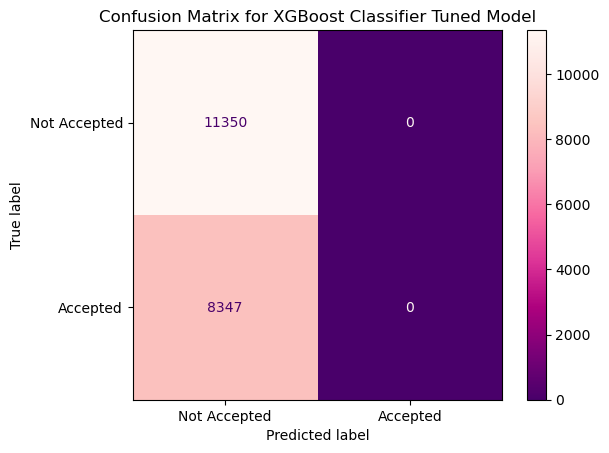

In [270]:
# Displaying classification report and confusion matrix
classification_report_confusion_matrix(xg_boost_class_random, 'XGBoost Classifier', y_xg_boost_tuned_test_pred, True)

In [271]:
# Displaying the cross validation score for train set
cross_validation(xg_boost_class_random)

Precision Score - All - Cross Validation  :  [0.         0.26086957 0.42857143 0.         0.        ]
Precision Score - Mean - Cross Validation :  0.13788819875776398
Precision Score - Std - Cross Validation  :  0.1770088261421801
Precision Score - Range of Train-Set       :  -0.03912062738441613 - 0.3148970248999441


### Base and Tuned Model Comparison

In [272]:
# Creating dictionary of all the models
model_comparison_dict = {
    'CatBoost Classifier - Base': [
        cat_boost_class_accuracy_train, cat_boost_class_accuracy_test, '---',
        cat_boost_class_precision_train, cat_boost_class_precision_test
    ],'CatBoost Classifier - Tuned': [
        cat_boost_tuned_accuracy_train, cat_boost_tuned_accuracy_test, '---',
        cat_boost_tuned_precision_train, cat_boost_tuned_precision_test
    ], 'XGBoost Classifier - Base': [
        xg_boost_class_accuracy_train, xg_boost_class_accuracy_test, '---',
        xg_boost_class_precision_train, xg_boost_class_precision_test
    ],  'XGBoost Classifier - Tuned': [
        xg_boost_tuned_accuracy_train, xg_boost_tuned_accuracy_test, '---',
        xg_boost_tuned_precision_train, xg_boost_tuned_precision_test
    ]
}

pd.DataFrame(model_comparison_dict, index=['Accuracy - Train', 'Accuracy - Test', '---', 'Precision Score - Train', 'Precision Score - Test'])

,CatBoost Classifier - Base,CatBoost Classifier - Tuned,XGBoost Classifier - Base,XGBoost Classifier - Tuned
Accuracy - Train,0.618254,0.577816,0.639717,0.577728
Accuracy - Test,0.570493,0.570493,0.570493,0.560542
---,---,---,---,---
Precision Score - Train,0.863088,1.0,0.796431,0.0
Precision Score - Test,0.438116,0.438116,0.438116,0.418983


From the table above, we observe that the base models still outperforms the tuned models. We can see that the scores of tuned model is clearly biased. As stated earlier, the base CatBoost Classifier and base XGBoost Classifier model has a quite similar performance. But, we can see that the XGBoost Classifier model is slightly more stable and reliable because the difference of the precision score for the train and test set is slightly smaller than the CatBoost Classifier model. Additionally, the running time of the XGBoost Classifier model is significantly faster. Therefore, we select the base XGBoost Classifier as the best model for this project.

# **Model Saving**

In [278]:
# Saving the model
with open('deployment/xgb_base_model.pkl', 'wb') as file_1:
    pickle.dump(xg_boost_class_pipe, file_1)

We've successfully saved the best model.

# **Model Inference**

## Load Model

In [288]:
# Load Model
with open('deployment/xgb_base_model.pkl', 'rb') as file_1:
  model = pickle.load(file_1)

model

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('winsoriserIqr',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             missing_values='ignore',
                                                             tail='both',
                                                             variables=['postal_code',
                                                                        'annual_mileage',
                                                                        'speeding_violations']),
                                                  ['postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations']),
                                                 ('winsoriserNormal',
                                                  Winsorizer(missing_values='...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

## Making Dummy Data

In [290]:
# Making dummy data
data_inf = {
    'id': [1001, 1002, 1003], 
    'age': ['26-39', '60+', '40-64'], 
    'gender': ['female', 'male', 'female'], 
    'driving_experience': ['0-9y', '30y+', '20-29y'], 
    'education': ['university', 'university', 'university'], 
    'income': ['upper class', 'middle class', 'poverty'],
    'credit_score': [0.70, 0.81, 0.49], 
    'vehicle_ownership': [1, 1, 0], 
    'vehicle_year': ['after 2015', 'before 2015', 'before 2015'], 
    'type_of_vehicle': ['sports car', 'sedan', 'suv'],
    'married': [0, 1, 1], 
    'children': [0, 0, 1], 
    'postal_code': [10238, 10238, 10238], 
    'annual_mileage': [17000.0, 15000.0, 7000.0],
    'speeding_violations': [1, 0, 0], 
    'duis': [0, 0, 0], 
    'past_accidents': [0, 0, 0], 
    'issue': ['scratch', 'dent', 'lamp broken']
}

df_inf = pd.DataFrame(data_inf)

df_inf

,id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,type_of_vehicle,married,children,postal_code,annual_mileage,speeding_violations,duis,past_accidents,issue
0,1001,26-39,female,0-9y,university,upper class,0.70,1,after 2015,sports car,0,0,10238,17000.0,1,0,0,scratch
1,1002,60+,male,30y+,university,middle class,0.81,1,before 2015,sedan,1,0,10238,15000.0,0,0,0,dent
2,1003,40-64,female,20-29y,university,poverty,0.49,0,before 2015,suv,1,1,10238,7000.0,0,0,0,lamp broken


## Predict Insurance Claims

In [291]:
# Predict the inference data
y_pred_inf = model.predict(df_inf)
targets = ['Denied', 'Accepted']

print(f'Predicted Insurance Claims on Customer ID - {df_inf.id.loc[0]}: {targets[int(y_pred_inf[0])]}')
print(f'Predicted Insurance Claims on Customer ID - {df_inf.id.loc[1]}: {targets[int(y_pred_inf[1])]}')
print(f'Predicted Insurance Claims on Customer ID - {df_inf.id.loc[2]}: {targets[int(y_pred_inf[2])]}')

Predicted Insurance Claims on Customer ID - 1001: Denied
Predicted Insurance Claims on Customer ID - 1002: Denied
Predicted Insurance Claims on Customer ID - 1003: Denied


# **Conclusion**

The base XGBoost Classifier model is chosen as the best model for now. The performance of the model is still quite poor but sufficient for now as it's still performs the best compared to other trained models. Right now, the model's performance is approximately 57%. While the precision score is stable at approximately 42%. Based on this score, we can see that the model is still underfit and struggles to predict the label accurately. However, due to time restriction, we decided that for now the XGBoost Classifier model still the best model.

Further improvements:
- Improving the Data
- Re-iterating the Feature Engineering
- Try Other Algorithms